# Web Scraping Basics Workshop

Do you you want to get data from a Website or lots of Websites from the Interwebs? Then this workshop is for you!

And for this Workshop, assume that you are a jobless bloke but can't relocate so you need a Work From Home job. And you want to know **what kind of jobs are out there that are available for Work From Home**. So that you can upskill and apply for those kinds of jobs and you won't be so broke anymore.

But before we dive to code, lets just set up what we need.

![image.png](attachment:834f4661-8417-4eb7-b490-5a740a5a900f.png "Source: https://www.reddit.com/r/memes/comments/f1a9uv/this_meme_was_made_by_unemployment_gang/")
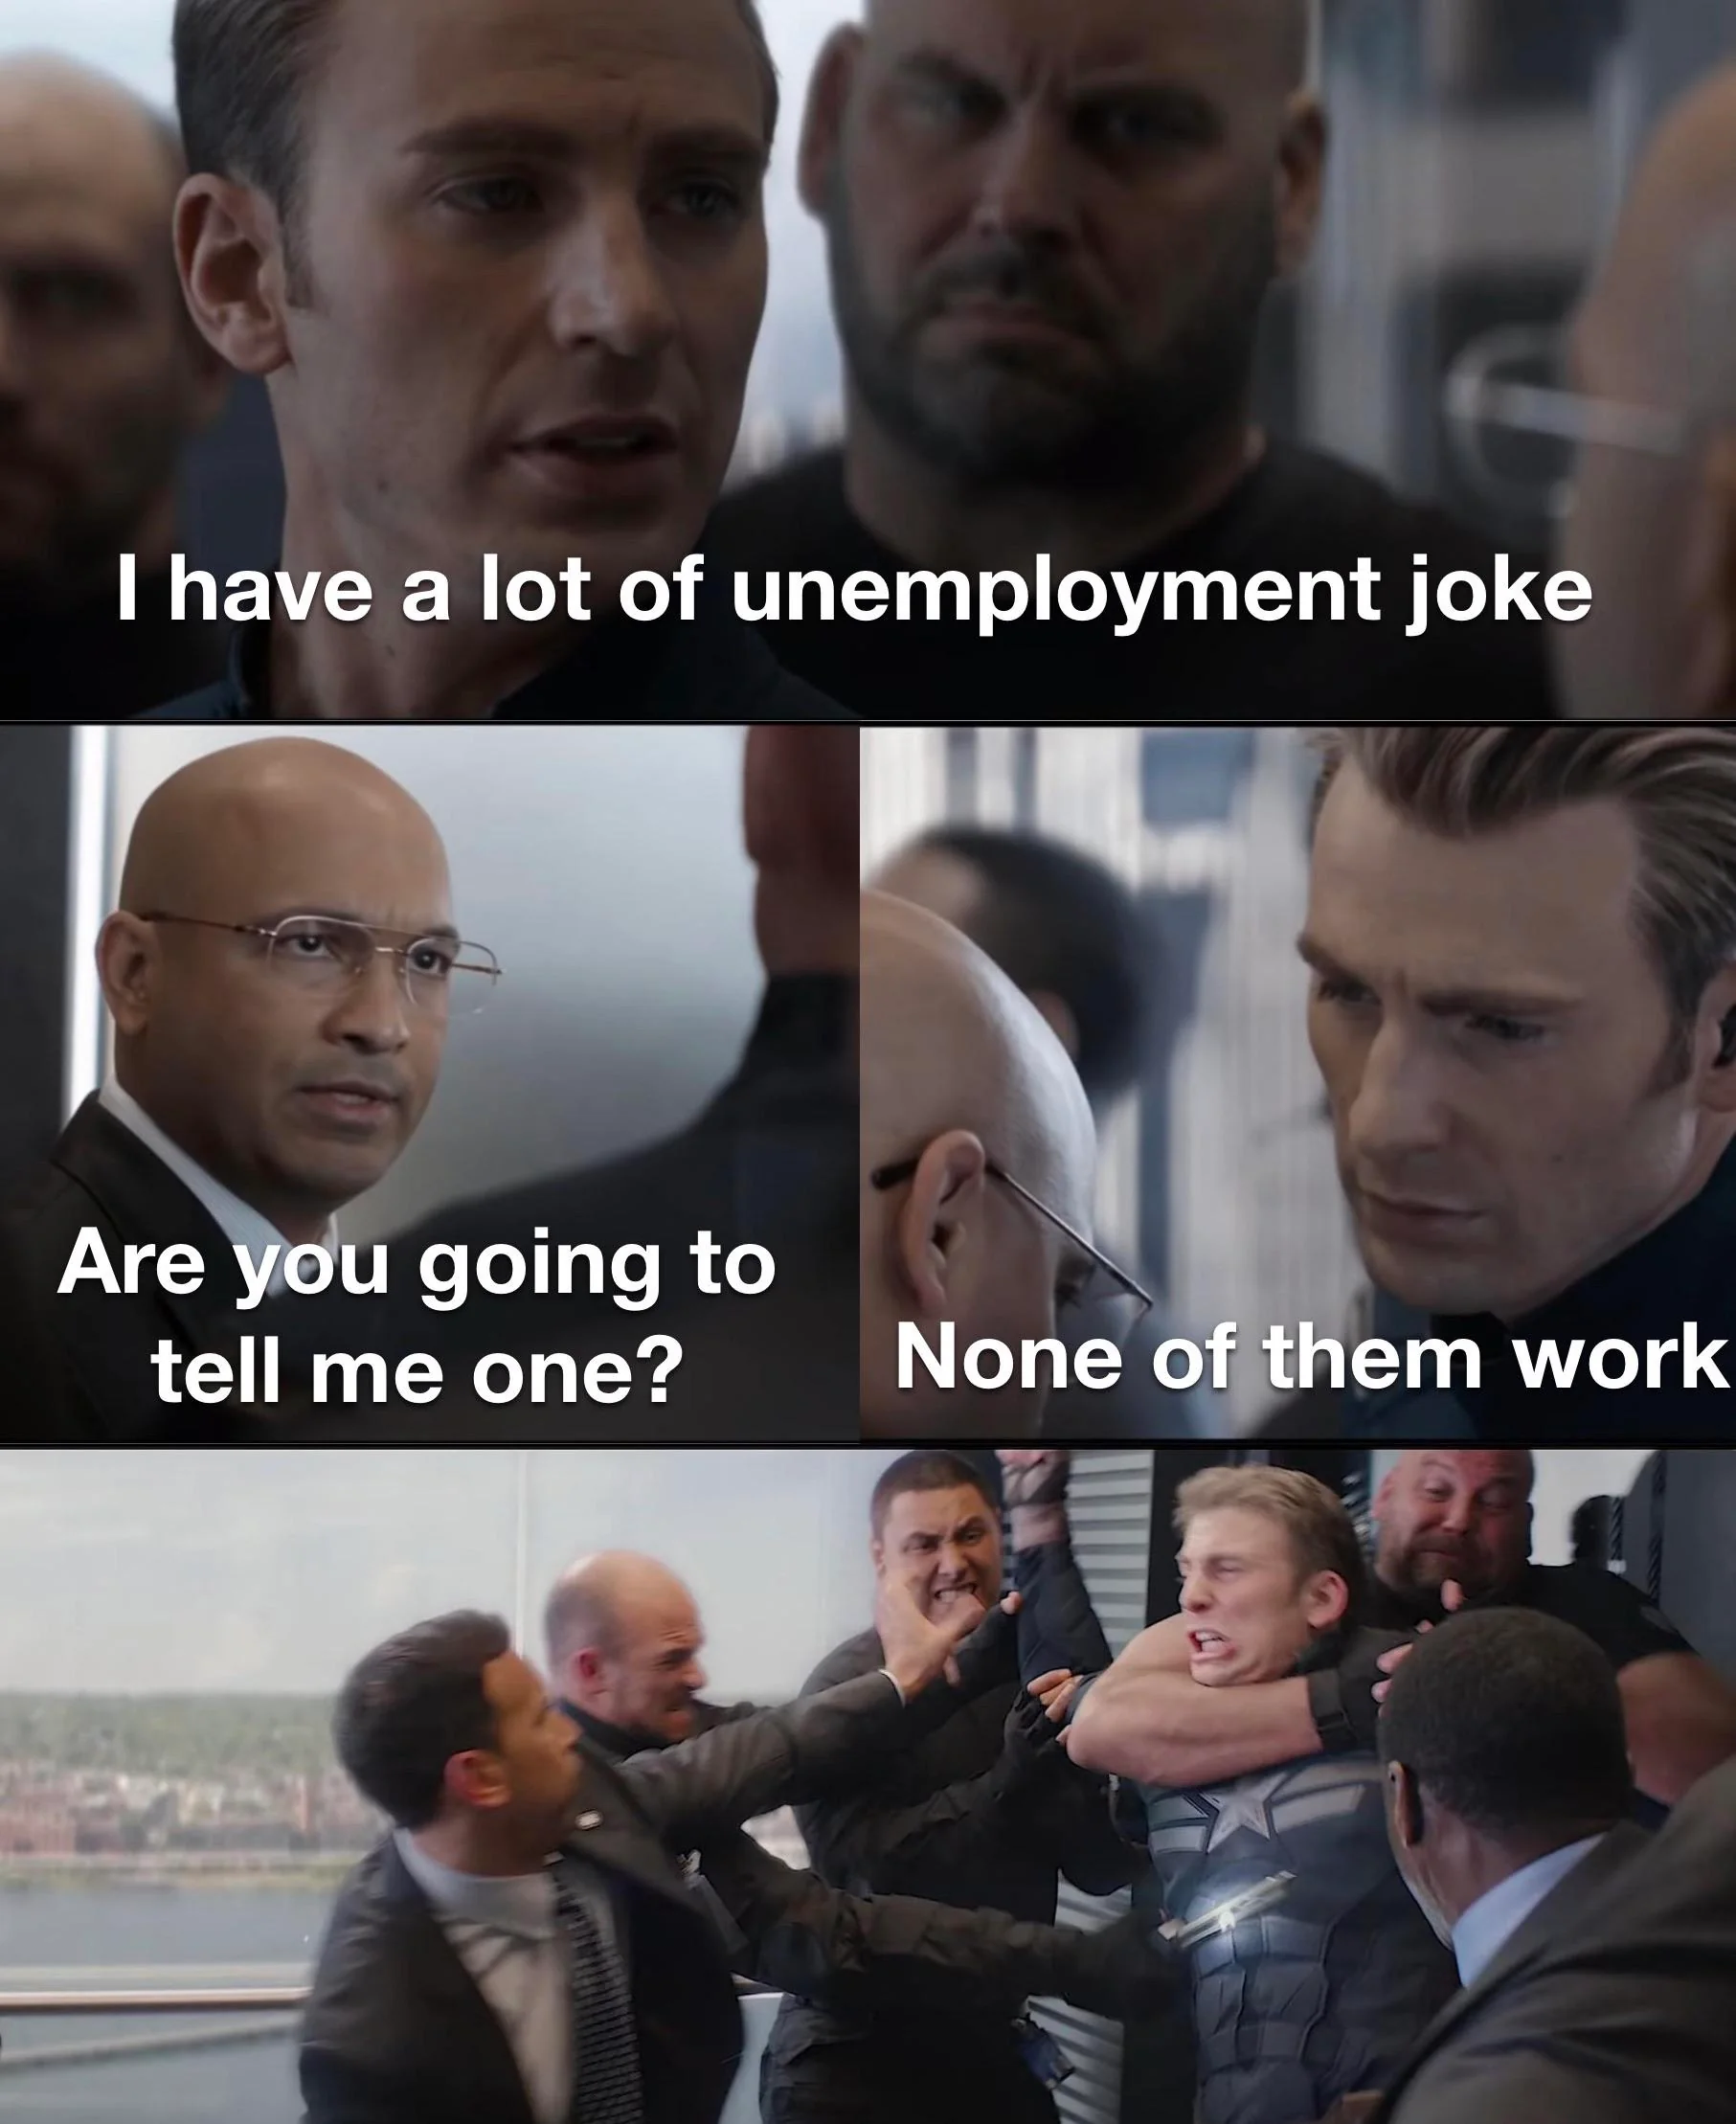

## Chapter 0: Setup and Installation

First of all, we do hope that you have your Laptop ready, and follow the Document (that you should have received if you are a Workshop Participant) on how to install [**Anaconda**](https://www.anaconda.com/download), [**Google Chrome**](https://www.anaconda.com/download), and the [**Workshop Files**](https://github.com/pizzapy/web-scraping-basics).

Hats off to you if you're able to do that. Now let me do my memes in peace.

We're just installing some Python Packages here and making sure some of the things we'll use in the workshop works.

Execute a Code Cell and go to the next Code Cell by **Clicking that Code Cell** and **Pressing *Shift + Enter*** or **Clicking the *Play* Button** at the top left of the Page. If you just want to execute a specific Code Cell, **Click on that Code Cell** and **Press *CTRL + Enter***.

In [ ]:
# Install needed Packages for this workshop
!pip install lxml pandas webdriver-manager -qU
!conda install -y -c conda-forge python-chromedriver-binary selenium

In [ ]:
import lxml
import pandas as pd
import requests
import selenium
from IPython.core.display import HTML

In [ ]:
# Source: https://gist.github.com/primaryobjects/d5346bf7a173dbded1a70375ff7461b4
# Something we need to get the Chrome Version on your Machine.
import os
import re
from sys import platform

def extract_version_registry(output):
    try:
        google_version = ''
        for letter in output[output.rindex('DisplayVersion    REG_SZ') + 24:]:
            if letter != '\n':
                google_version += letter
            else:
                break
        return(google_version.strip())
    except TypeError:
        return

def extract_version_folder():
    # Check if the Chrome folder exists in the x32 or x64 Program Files folders.
    for i in range(2):
        path = 'C:\\Program Files' + (' (x86)' if i else '') +'\\Google\\Chrome\\Application'
        if os.path.isdir(path):
            paths = [f.path for f in os.scandir(path) if f.is_dir()]
            for path in paths:
                filename = os.path.basename(path)
                pattern = '\d+\.\d+\.\d+\.\d+'
                match = re.search(pattern, filename)
                if match and match.group():
                    # Found a Chrome version.
                    return match.group(0)

    return None

def get_chrome_version():
    version = None
    install_path = None

    try:
        if platform == "linux" or platform == "linux2":
            # linux
            install_path = "/usr/bin/google-chrome"
        elif platform == "darwin":
            # OS X
            install_path = "/Applications/Google\ Chrome.app/Contents/MacOS/Google\ Chrome"
        elif platform == "win32":
            # Windows...
            try:
                # Try registry key.
                stream = os.popen('reg query "HKLM\\SOFTWARE\\Wow6432Node\\Microsoft\\Windows\\CurrentVersion\\Uninstall\\Google Chrome"')
                output = stream.read()
                version = extract_version_registry(output)
            except Exception as ex:
                # Try folder path.
                version = extract_version_folder()
    except Exception as ex:
        print(ex)

    version = os.popen(f"{install_path} --version").read().strip('Google Chrome ').strip() if install_path else version

    return version

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

service = ChromeService(ChromeDriverManager(get_chrome_version()).install())
browser = webdriver.Chrome(service=service)
# Don't be surprised, but this will open up a Chrome Browser showing the Python Website.
browser.get("https://www.python.org")

In [ ]:
# This will close the Browser.
browser.close()
browser.quit()

First important note:

**If any** of these commands **error** out (they'll usually show Red in color), **please call your Instructor** so he/she has something to do aside from chatting with the ones who invited him/her over.

Second important note:

We're using **Jupyter Notebook for Instructional Purposes only**. Web Scraping is (usually) something that has to be done repeatedly, depending on how often the website you want to get data from or interact with is updated. So you'll have to create a Production-ready Codebase and a way to Run this Code regularly... which are both outside the scope of this workshop.

## Chapter 1: Web Scraping Basics with Requests and LXML

The fastest way to find available WFH Jobs is to search on Job Posting sites. And one of our favorite Job Posting sites (as Cebuanos) is [**Mynimo**](mynimo.com).

So for Chapters 1 and 2, we'll be learning the basics of Web Scraping and Web Crawling by Scraping and Crawling for Work From Home Job Postings in Mynimo.

And to start with definitions, **Web Scraping** is basically using a program to **download and process content from the web** [[1]](#reference_1). In other words, instead of you surfing the web with your browser, **you let a program surf the web for you**.

How do we do that? Well, why not discuss how do you usually surf the web and download stuff from it?

### Section 1.1: Web Browser, URL, and HTTP Basics

So you surf the web by **opening your** favorite **Google Chrome browser** (We'll all be normies for today).

Then, you type the website address, also known as **URL *(uniform resource locator)***, on the address bar of the browser.

Let's type in **[mynimo.com](https://www.mynimo.com)** and press **Enter**.

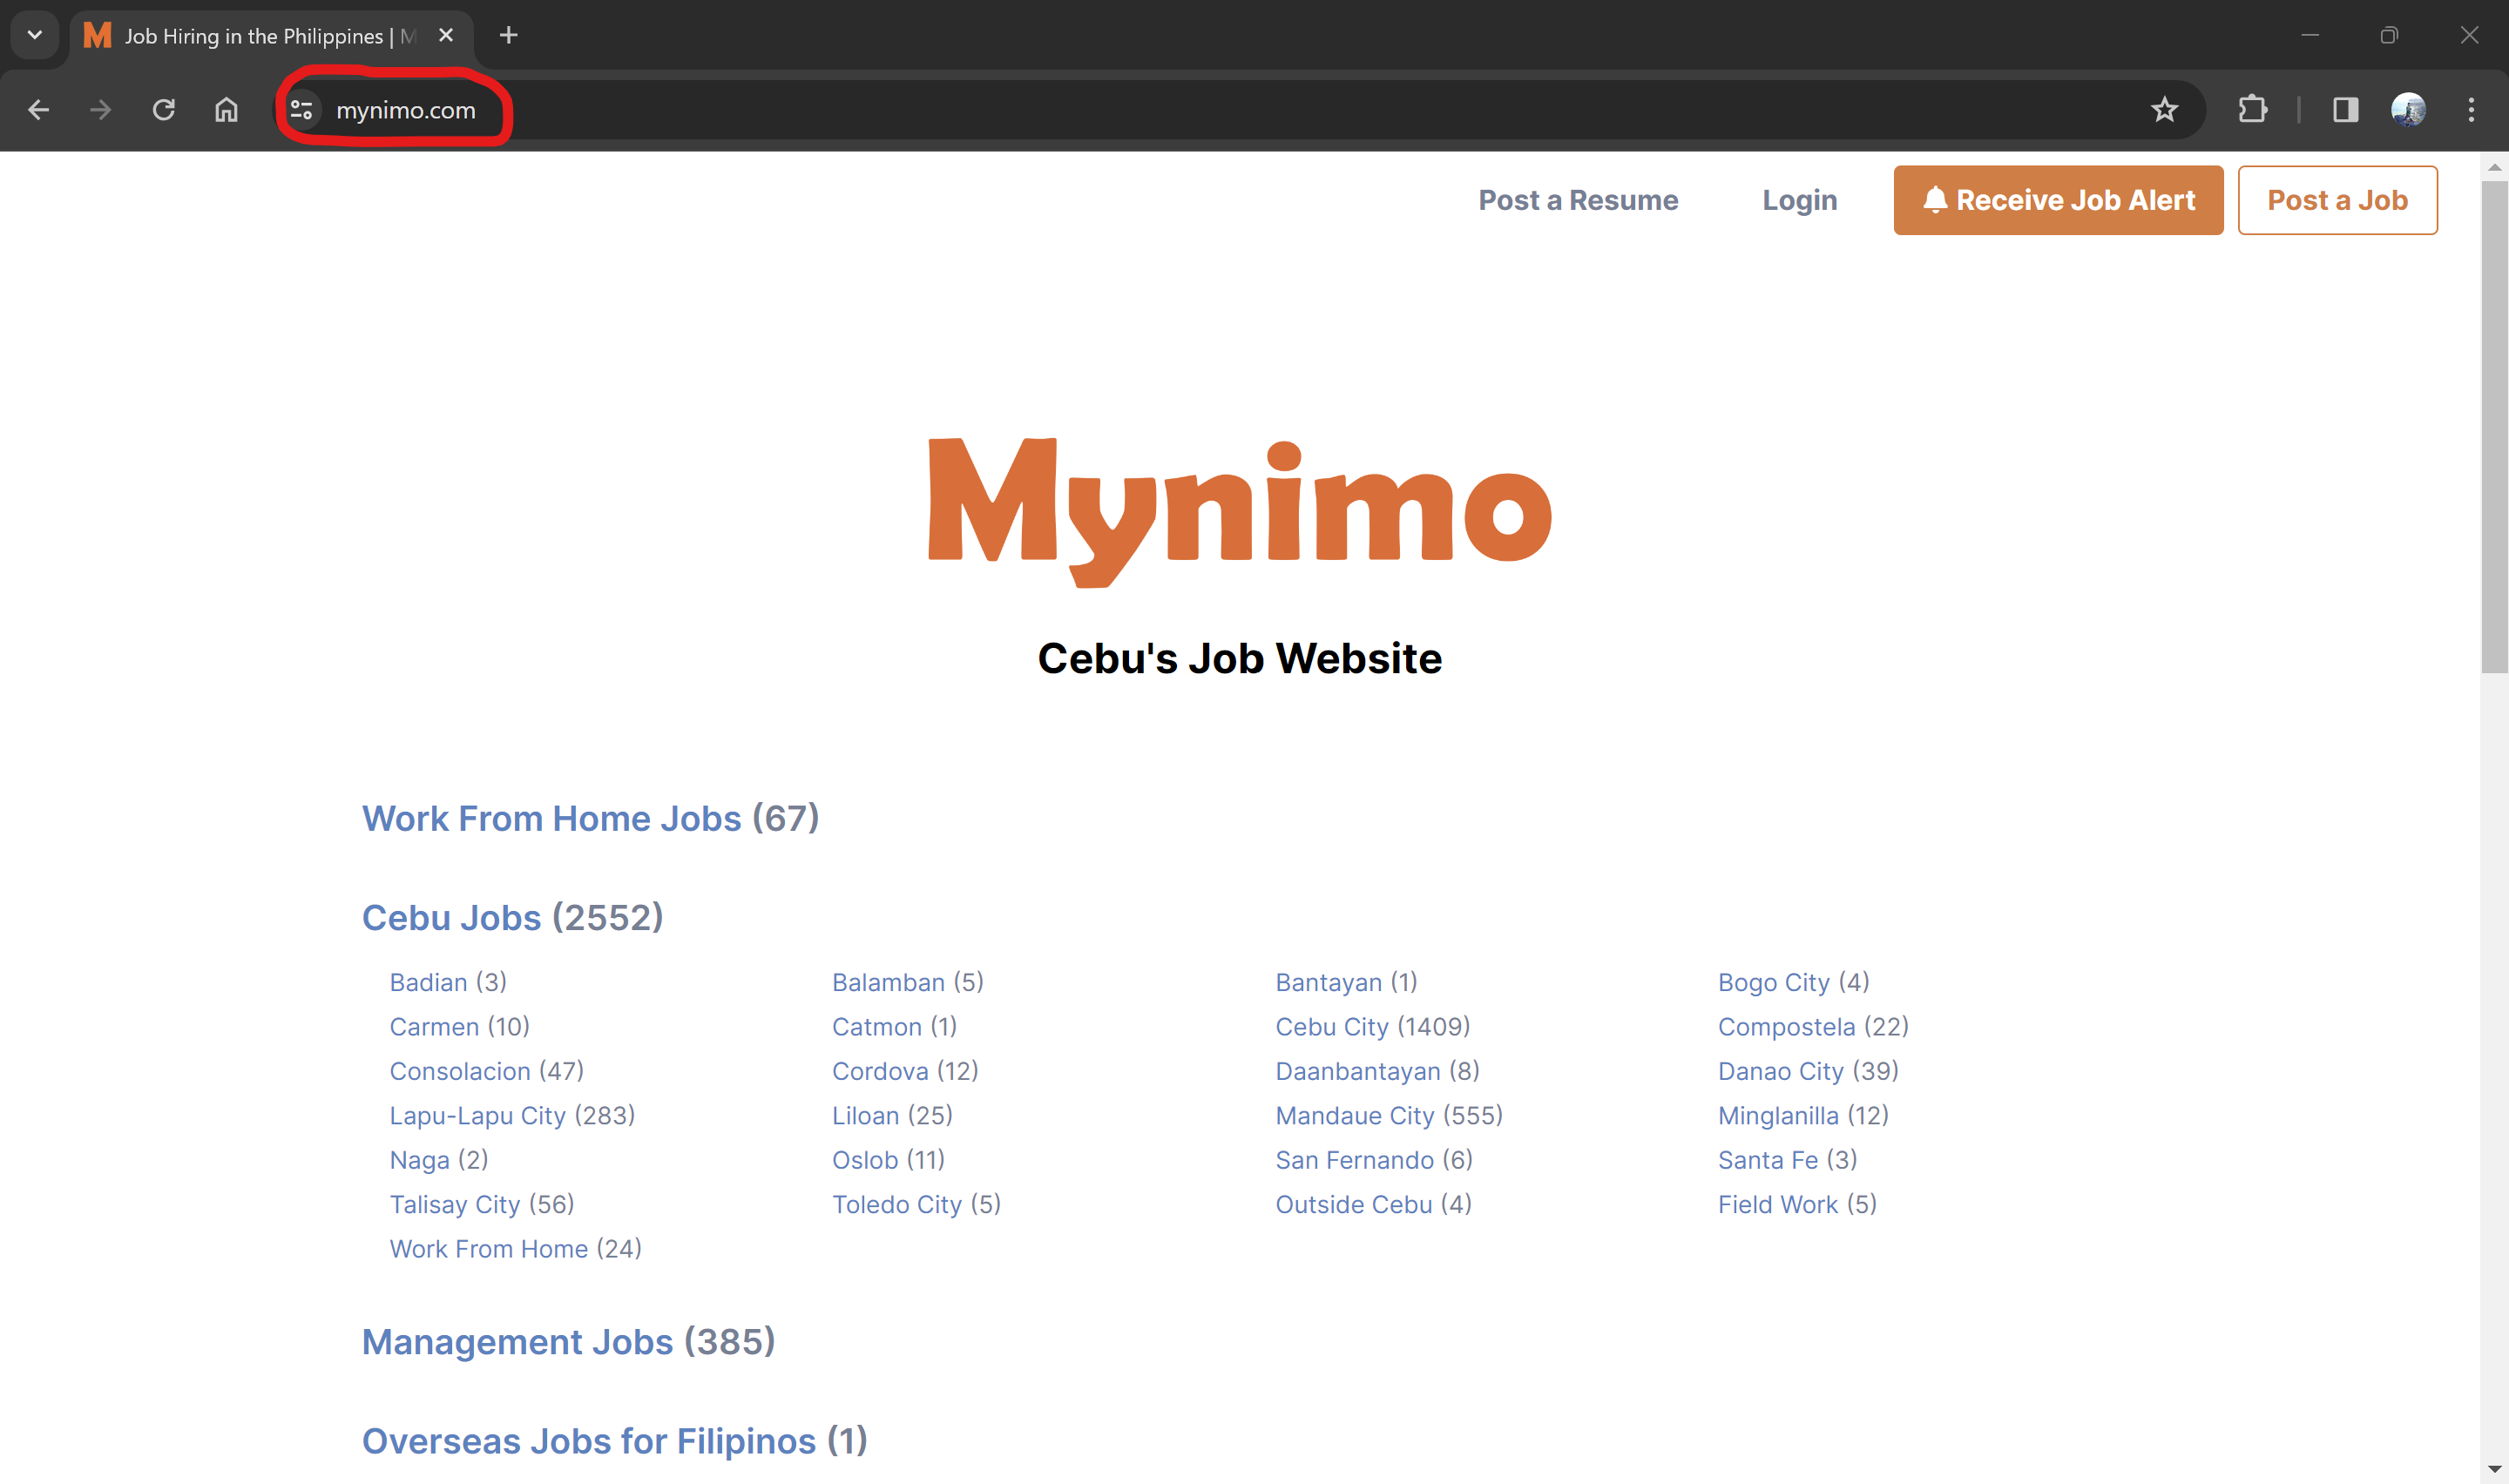

Voila! The homepage of Mynimo appears!

But that's not what we want! We want Job Postings! I don't see any Job Postings here!

So, let's click on W... ohhh! I'm also curious what Jobs are available in Cebu! I heard the parties there are fun!

So we click on the [**Cebu Jobs**](https://www.mynimo.com/cebu-jobs) link and see the Job Postings available in Cebu.

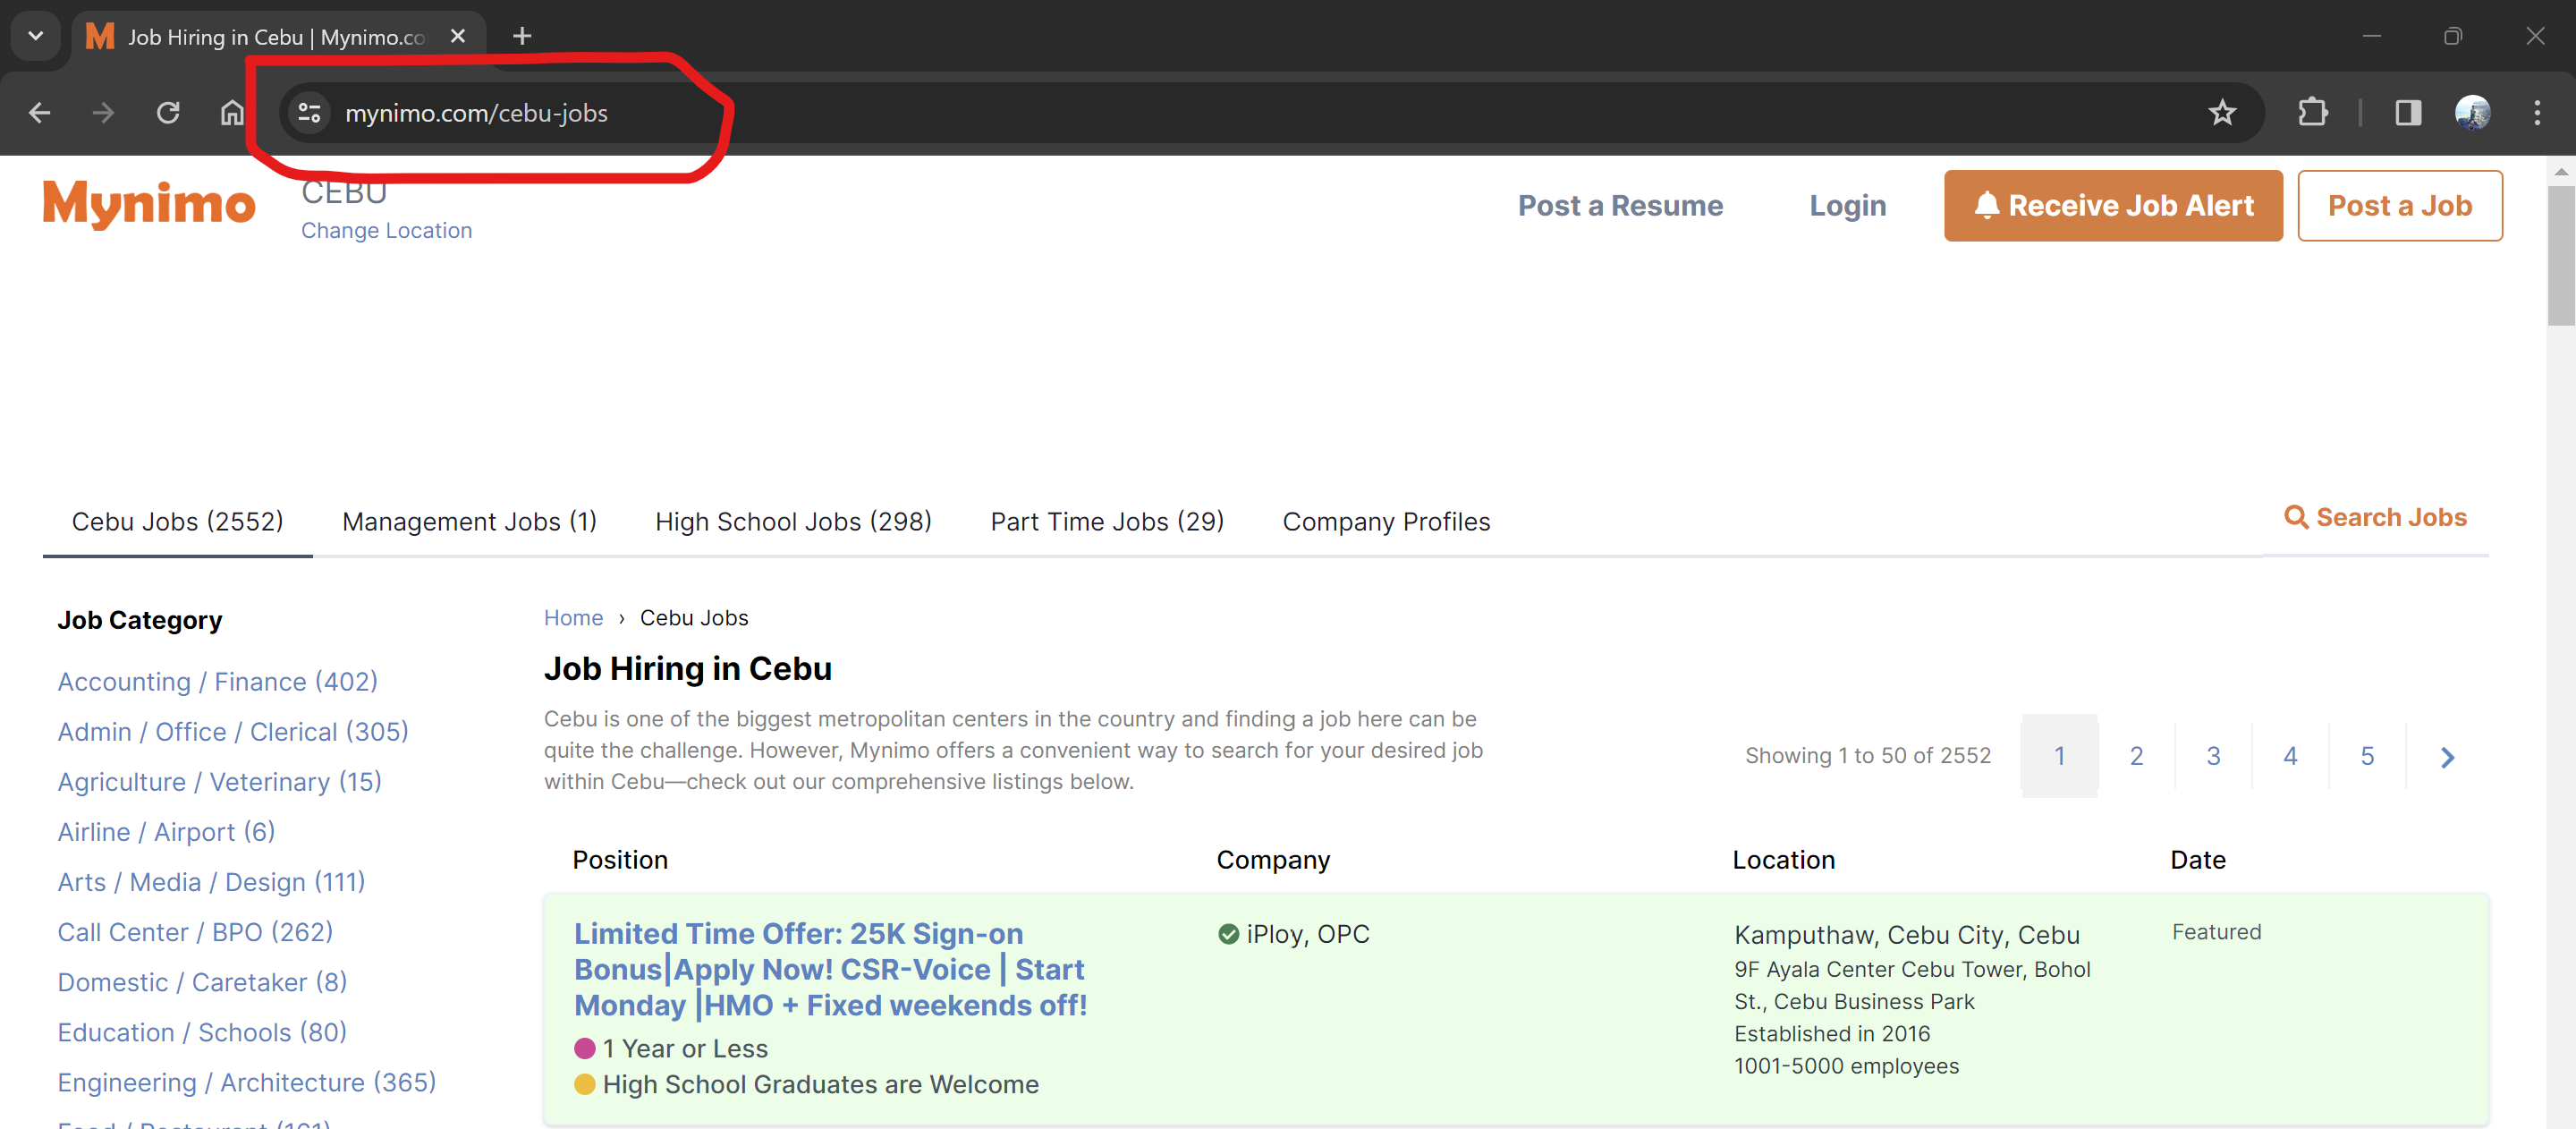

#### Section 1.1.1: URL Basics

Did you notice the change in URL?

Well... you should. Because that's a fundamental concept that we use in Web Scraping!

So, sure. You all know how to type a URL on the Address Bar. But what's a URL in the first place?

To explain succintly, and with the help of Ch... Mozilla (you can check the explanation here: [[2]](#reference_2)):

A **URL** is an **address of a unique Resource**. A **Resource** may be a Page (like what you see on your Browser), an Image, a PDF, etc. And like a real-life address, the URL can be moved to be pointed to another resource or to nothing. That's why we have the famous **HTTP 404 Not Found** error.

URLs also have structure as illustrated below:

![image.png](attachment:6361b2d9-3e44-4d8f-b6da-ff3c5d9f8321.png "Source: https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_URL")
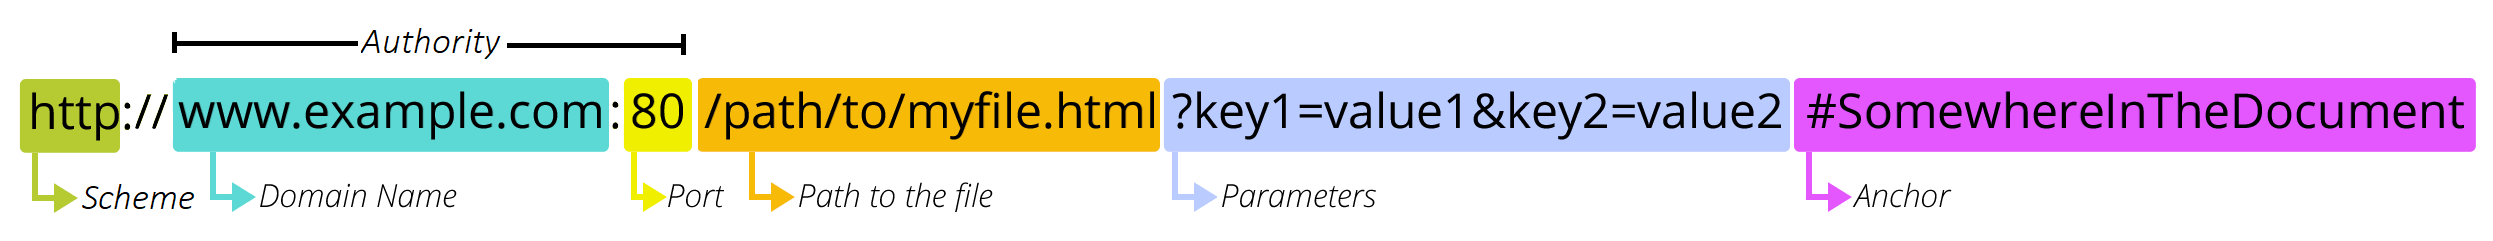

Let's discuss these following parts:
1. **Scheme**: This indicates the **Protocol** (or the agreed upon Language of Communication between Computers) that our Browser must use to access the Resource. For Web Scraping, we'll deal mostly with **HTTP *(http://)*** and it's secure version, **HTTPS** ***(https://)***.
2. **Domain Name**: This is the Human-Readable (usually) **Address on** where in **the Internet** is your resource hosted. The Domain Name is translated to a specific **IP Address** by a **DNS (Domain Name Server)**. Also, if you type in **localhost** as the Domain Name (or **127.0.0.1** since that's the Home IP Address), that means the Page is hosted inside **your machine**.
3. **Port**: This is the **address of the Website *WITHIN* the Server or Machine the Website is Hosted on**. You usually won't see this on the URL as most **Protocols** would have a default **Port**. For **HTTP** it's **80** while for **HTTPS** it's **8080**.
4. **Path to the file** (or resource): Since a Website is a collection of Web Pages, then this is the **address of the Web Page *WITHIN* the Website**. The pattern of the Path depends on the Programming of the website. The Path can either be literal file paths on the Server's File System, or use certain Keywords and IDs to create a route to a certain Page (Web Developers are familiar with this).
5. **Parameters**: The Web Page may vary in Content depending on the **variables you pass on to**. Like let's say pass on a User ID to show a certain User on the Page. Take note that it **starts with a Question Mark ("*?*")** and has a **<"Key">=<"Value">** Pair pattern. Each Pair is **separated by an Ampersand ("*&*")**.
6. **Anchor**: This is a **location *WITHIN* the Web Page**.

#### Section 1.1.2: URL Parsing with Python

To help you visualize, why not **take a look at the URL on your Address Bar** on where this Jupyter Notebook is?

Let's use the built-in `urlparse` function from the `urllib.parse` library to break-down the structure of the **URL** of our Jupyter Notebook.

Do the following:
1. Copy the URL on your Web Browser.
2. Paste the URL on the `url` variable on the Code Cell below, Make sure the URL is enclosed in Quotation Marks ("").
3. Run the Code Cell below by **Clicking on it** and **Pressing *CTRL + Enter***

In [ ]:
from urllib.parse import urlparse

url = "Replace this entire text with the URL on your Address Bar here. Make sure the URL is enclosed in Quotation Marks."

url_components = urlparse(url)
print(url_components)
print(f"Scheme: {url_components.scheme}")
print(f"Domain Name: {url_components.hostname}")
print(f"Port: {url_components.port}")
print(f"Path to File: {url_components.path}")
print(f"Parameters: {url_components.params}")
print(f"Anchor: {url_components.fragment}")

**IMPORTANT:** Do take note that the Path to File looks... weird. It should look like the File Path of this Jupyter Notebook, but it has weird characters. That is because text on a URL has to be ***quoted*** or ***encoded*** in order deal with Unsafe (like Brackets "{}" and Quotation Marks "()"), Special or Reserved Characters (like Question Mark "?", Equal Sign "=", and Slashes "/") on the URL. To ***unquote*** the text, you can use the `unquote` function from the `urllib.parse` library.

Try out the Code Cell below!

In [ ]:
from urllib.parse import unquote

print(unquote(url_components.path))

NOW it looks like the File Path to this Notebook!

For Web Scraping, the we usually take note of **Path** and **Parameters**.

- **Path** is helpful when scraping multiple Pages on a Website. These Websites, as I've mentioned, would usually have patterns that lets you predict the URL that you have to access to get the Page you want. That or you can use that pattern to get the information you want.
- **Parameters** is also helpful on either manipulating the Page itself by passing on certain variables, or is also a rich source of information since URL parameters already come with Key-Value Pairs. The Key may be what the Information is about, and the Value is the Information itself.

Again, when trying to get text from the URL, **DON'T FORGET TO UNQUOTE IT!**

#### Activity 1.1: Get information from the URL. (15 minutes)

Go back to [**Mynimo Cebu Jobs**](https://www.mynimo.com/cebu-jobs). Then click one of the Job Postings there.

Try getting information from the URL of the Job posting you clicked. Specifically, get the following information if you can:
- **Path Pattern**
- **Job Posting ID** (that Number on the URL Path)
- **Job Location**

We encourage you to play around and check other Job Postings. See if you find a pattern.

Oh. And to get the individual text on the URL Path (which are split by a slash "*/*"), let's say I want to get

***url*** from ***/parsed/url/here***

You can do:

In [ ]:
url_path = "/parsed/url/here"
split_url_path = url_path.split("/")
print(split_url_path)

So you see a List of Text (let's call text a *string*). You see that ***url*** is the ***3rd*** Item on the List. But in most Programming Languages including Python, we start counting at 0. So ***url*** is the ***2nd*** Item on the List. We access that by doing the following:

In [ ]:
print(split_url_path[2])

Gahd, this actually needs some Python basics. But you can do it! Code away!

And don't hesitate to ask help from the instructor!

In [ ]:
from urllib.parse import urlparse, unquote

url = "Replace this entire text with the URL of the Mynimo Job Posting. Make sure the URL is enclosed in Quotation Marks."

# Code here. You can use urlparse(), unquote(), and print() on this activity. And don't forget the split() thingy!

#### More Information

Check out the Documentation for `urllib.parse` for more useful functions.

https://docs.python.org/3/library/urllib.parse.html

### Section 1.2: HTTP Basics and Downloading Web Pages from URL with HTTP and Requests Library

Of course URL information wouldn't be enough. We need to learn how to get information from the Web Page itself!

So, we need to learn how to communicate with the Server to download the Web Pages from the Website! And that means, we'll have to learn about HTTP for a bit.

#### Section 1.2.1: HTTP Basics

**HTTP (Hypertext Transfer Protocol)** is a Client-Server (in other words, one-is-to-one) set of agreed upon Text Formatting Rules so they can understand each other. So a Web Browser is the **Client** (also known as an **Agent**), and the **Server** is the one hosting the Website. The **Client** sends a **Request** to the **Server**. In response, the **Server** will send a **Response** back to the **Client**.

![image.png](attachment:bbdf0bf0-ae74-49d3-9fe1-fe403e8659b6.png "Source: https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_web_server/web-server.svg")
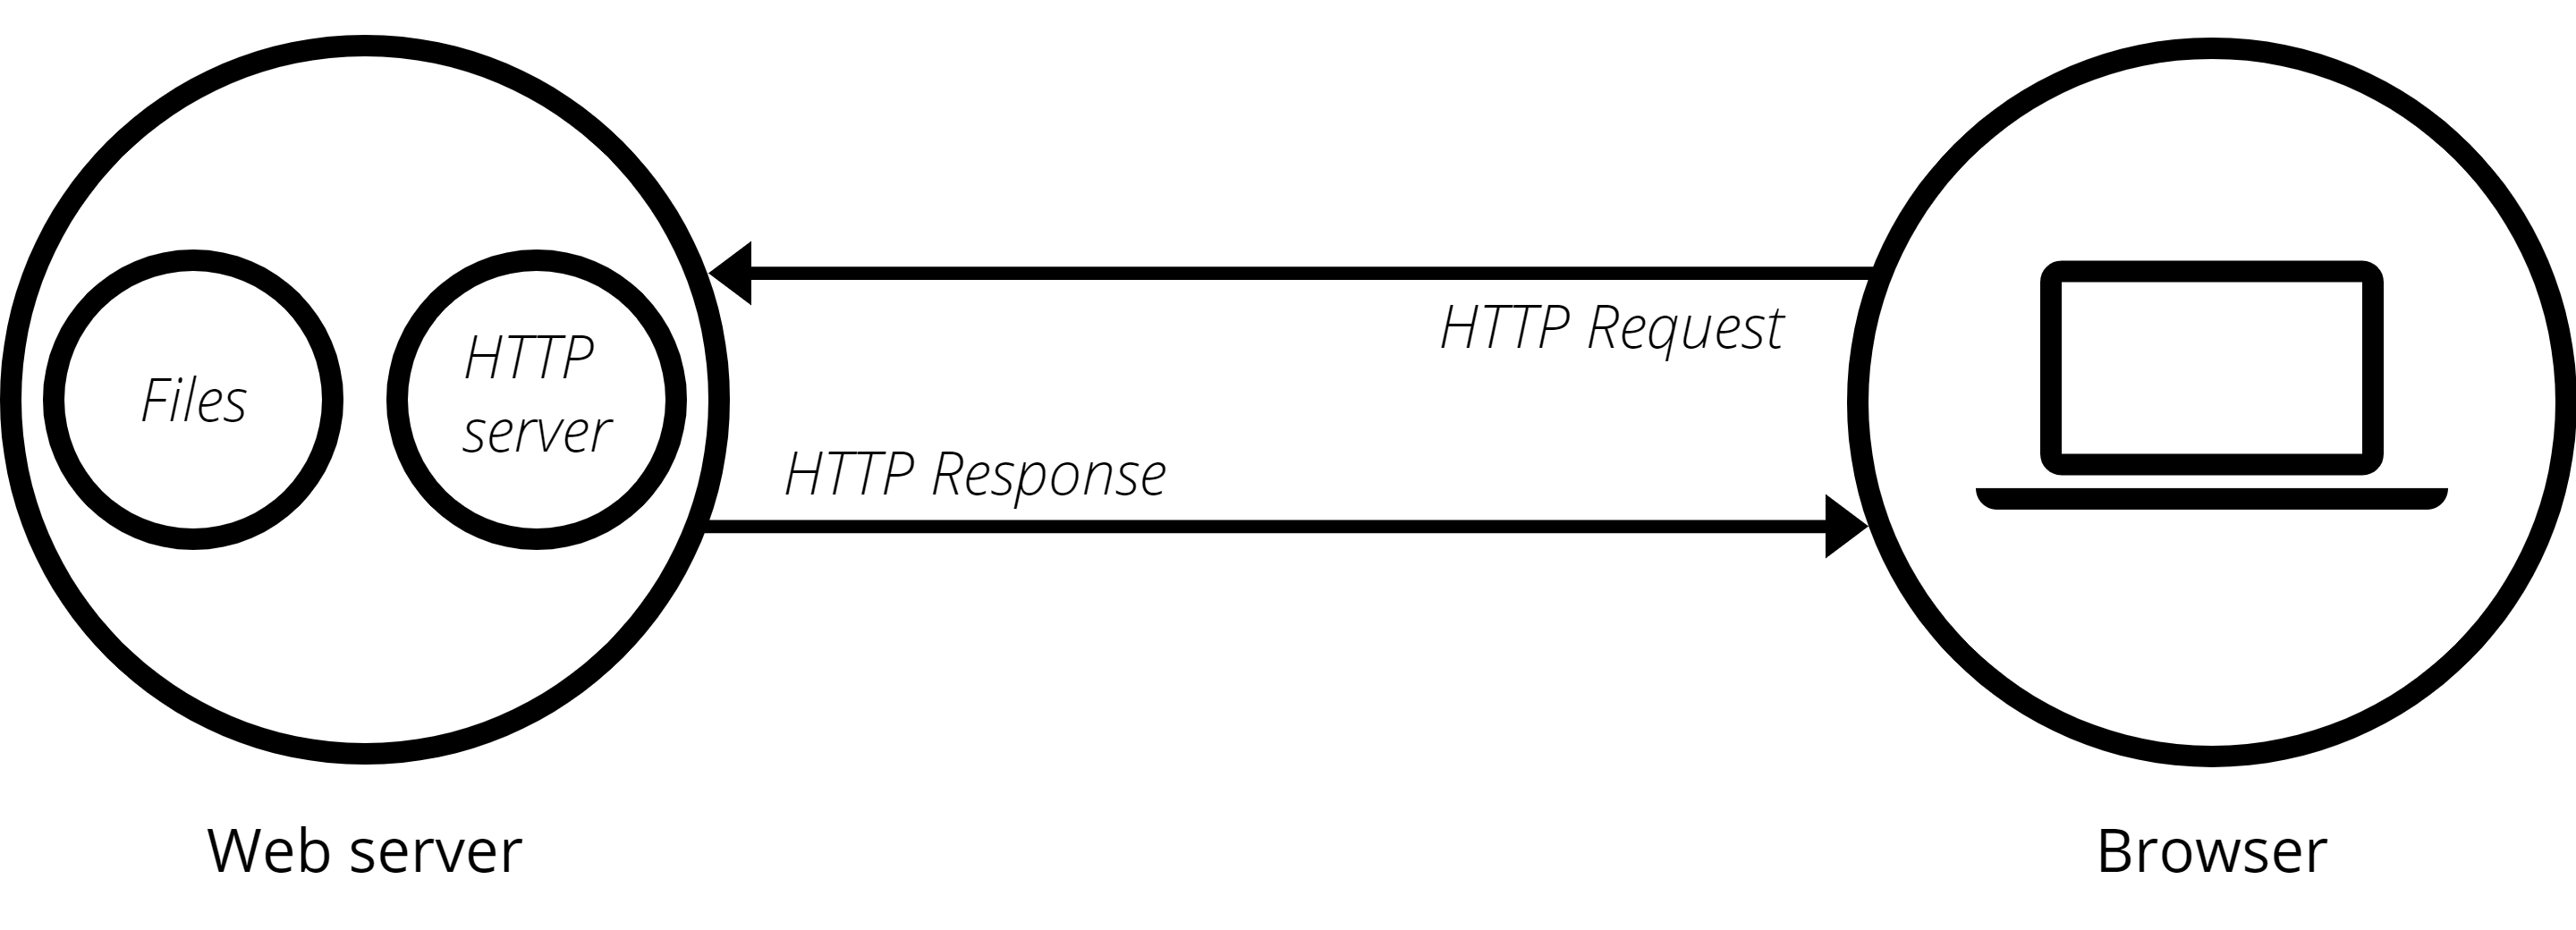

A **Request** consists of the following Parts:
1. **Start Line**: This is in the format of **\<HTTP Method\> \<Request Target\> HTTP/\<HTTP Version\>**. We will discuss **HTTP Method** later, while **Request Target** is the same **Path** as on the **URL** structure. You can also put the entire URL on the Request Target.
2. **HTTP Headers**: This contains connection information from the **Client** (e.g. **Host**, **User-Agent**), connection settings that the **Server** needs (e.g. **Authentication**), and information about the Data that you're sending (e.g. **Content-Type**, **Content-Length**).
3. **Body**: This contains Data that you want to send to the Server. But for our applications, we don't need to fill this one up.

Meanwhile, a **Response** is structured similarly:
1. **Start Line**: It has a different format of **HTTP/\<HTTP Version\> \<HTTP Response Status Code\> \<HTTP Response Status Message\>**. The **HTTP Response Status Code** and **HTTP Response Status Message** are messengers to confirm if the **Request** was processed successfully or if there was hiccups. The **HTTP 404 File Not Found** is an example of this. But what you actually want to see as HTTP Status is **HTTP 200 OK**.
2. **HTTP Headers**: This also contains connection information from the **Server** (e.g. **Server**, **Age**), connection settings that the **Server** has set, and information about the what the Server Sent (e.g. **Content-Type**, **Content-Length**).
3. **Body**: This contains Data that the Server sent you. For Web Scraping, this contains the **HTML Document** that you were asking for.

This is what a typical HTTP Request and Response looks like:

![image.png](attachment:e7389fc2-ed5a-42f6-99e0-97b84edafde7.png "https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages/httpmsgstructure2.png")
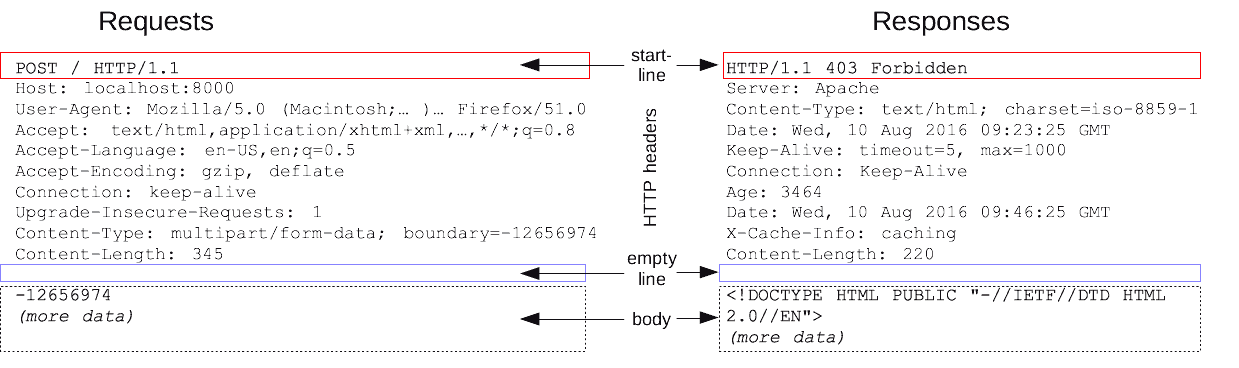

HTTP has a set of **HTTP Methods** (also known as *HTTP Verbs*) that the **Client** on what it wants to do **Server**: whether it wants to **GET** data from the Server, **POST** data to the Server, **UPDATE** data to the Server, or **DELETE** data from the Server.

There are other Methods that we won't cover. Besides, we only need to **GET** a Page from a URL for this application.

Our favorite Web Browser has been serving as the Client that is handling all this HTTP Processing.

But we need a Program our own Client. That's where the `Requests` library comes in.

#### Section 1.2.2: Using the *Requests* library

From the previous section, we need to build our own **Request** to send to the Server. That needs the following information:
1. **URL**: Yep, that'll be https://www.mynimo.com/cebu-jobs
2. **HTTP Method**: **GET** is our only answer here.
3. **Headers**: I'll explain later, but we'll need to fill up the **User-Agent** Header with something. Because the default **User-Agent** of the `Requests` library does not work. And just to fill you in, a **User-Agent** gives away **information about the Client and how it is accessing the Server**. Some information inclue what Web Browser you're using and what OS you're using (Windows, Mac, Android, etc.).

Once we receive the **Response** from the server, we just need to get the **text** from the Body. That will be the Web Page (or **Document**) that we're looking for.

The Code for that would look like the Cell below. Try running it! Go on! You can even change the **url** if you want. But please keep it safe for work.

In [ ]:
import requests
from IPython.core.display import HTML

# Use this header configuration so that you can access the websites properly. Trust me, Bro/Brodette. I'll explain later.
headers  = {
    "User-Agent": "Chrome"
}
# Change the URL if you want.
url = "https://www.mynimo.com/cebu-jobs"
response = requests.get(url=url, headers=headers)

# Extract the Text from the HTTP Response Body
document = response.text

# Use this command to display the Text as a Web Page.
display(HTML(document))

Relatively simple, isn't it? Well, that means you're ready to code one yourself!

#### Activity 1.2: Get the Job Posting Web Page. (5 minutes)

Remember the Job Posting Page you checked out in ***Activity 1.1***? You kinda saw a pattern on the Path for their Job Postings, where they use the following pattern:
```
https://mynimo.com/jobs/view/<Job Posting ID>
```

I got a Job Posting for you. But I only have the Job Posting ID: **442840**

I want you to use `Requests` to access that Job Posting Page on this notebook.

Use the sample code on the previous section as reference.

In [ ]:
# Come on. You can do it. It's as easy 1 + 1 ;)
# You can start with the following:
base_url = "https://mynimo.com/jobs/view/"
job_posting_id = "442840"

### Section 1.3: Web Scraping HTML Documents with LXML

Now we downloaded the Web Page Document of the Job Posting Page, we now need a way to extract information from this.

Specifically, we want to extract the following Information from the Job Posting Page:
- **Job Position**
- **Experience Level**
- **Company Name**
- **Job Location**
- **Date Posted**
- **Job Description (the entire text)**

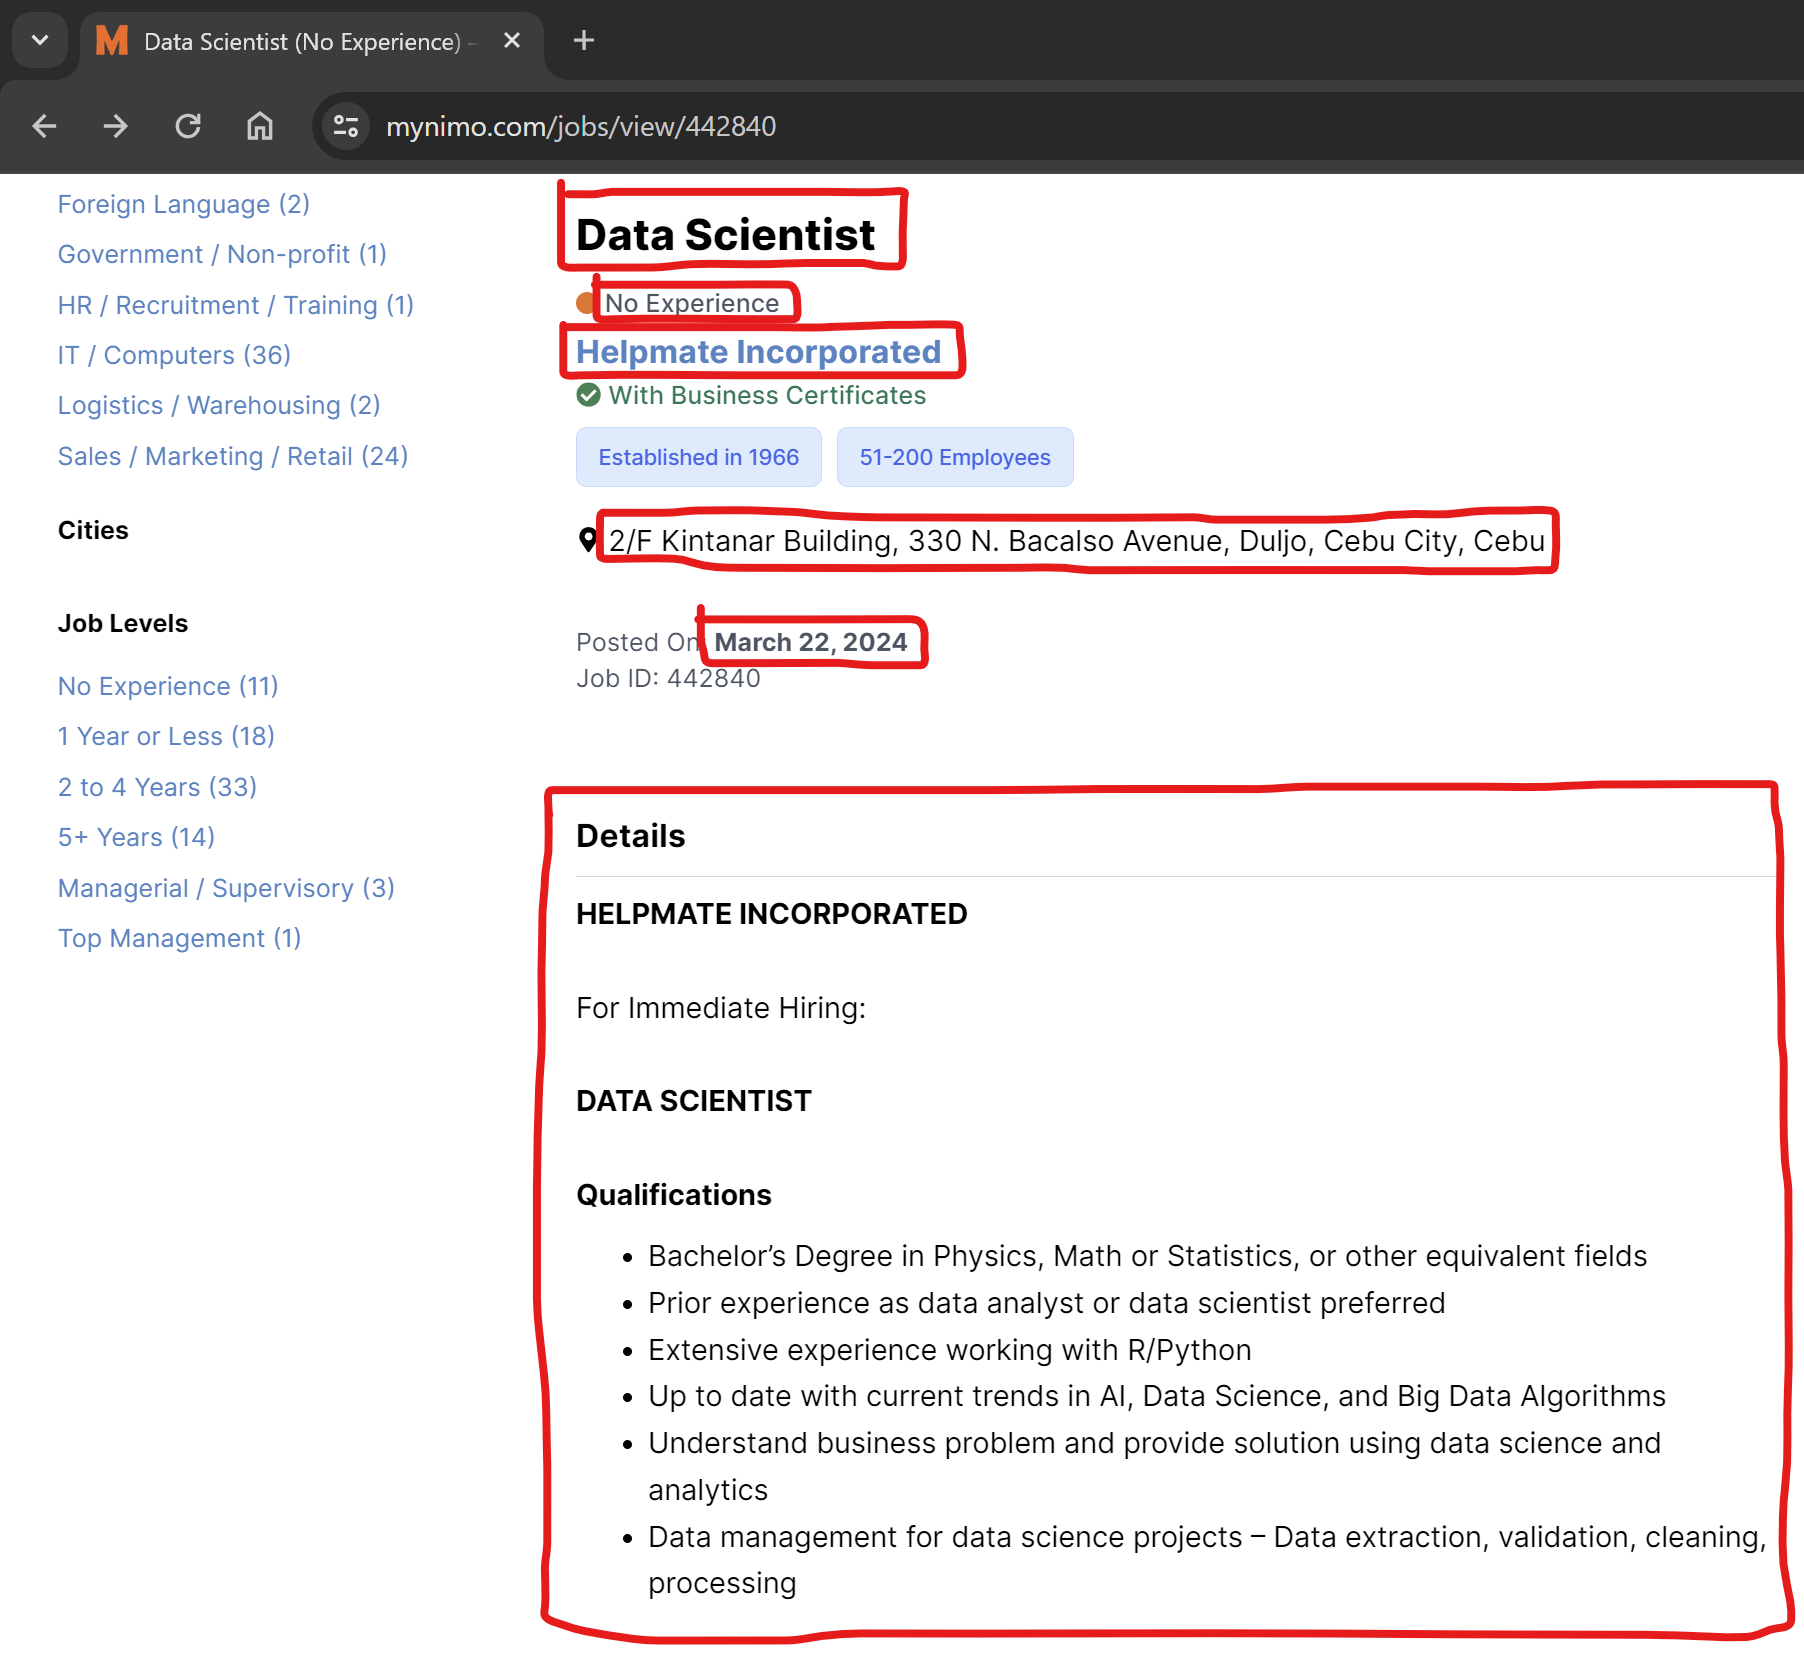

Before we're able to extract the data from this Web Page, we need to know what Web Pages really are.

And Web Pages are ALL **HTML** Documents. So we have to know a bit about **HTML**.

##### **[SPOILERS]**, this is what an HTML Document looks like in real life.

Execute the following Block of Code to show you some Beautiful... Beautiful Soup of an HTML Document.

In [ ]:
import requests
from lxml import etree, html

# Use this header configuration so that you can access the websites properly. Trust me, Bro/Brodette. I'll explain later.
headers  = {
    "User-Agent": "Chrome"
}
# Change the URL if you want.
url = "https://mynimo.com/jobs/view/442840"
response = requests.get(url=url, headers=headers)

# Extract the Text from the HTTP Response Body
document = response.text
document_root = html.fromstring(document)
print(etree.tostring(document_root, encoding='unicode', pretty_print=True))

#### Section 1.3.1: HTML Basics

**HTML** is the language of **ALL** Web Pages. It's that and *Javascript*.

To illustrate what an **HTML (How To Make Lumpia) Document** looks like, (rather than swimming on that Beautiful Spoiler Soup) here's a basic example:

```html
<!DOCTYPE html>
    <head>
        <title>Hello World!</title>
    </head>
    <body>
        <h1> This is your first HTML document </h1>
        <br>
        <p>This is how you make <strong>lumpia</strong></p>
        <br>
        <a href="https://www.mynimo.com">This goes to Mynimo.com</a>
    </body>
</html>
```

Which would look like this on a Web Browser:

<!DOCTYPE html>
  <head>
    <title>Hello World!</title>
  </head>
  <body>
    <h1> This is your first HTML document </h1>
    <br>
    <p>This is how you make <strong>lumpia</strong></p>
    <br>
    <a href="https://www.mynimo.com">This goes to Mynimo.com</a>
  </body>
</html>

On that basic HTML Document, we can notice that almost everything are always enclosed by **Tags**. All the other Tags and Text enclosed on the Tags are called **Elements**. There are different kinds of **Tags** like Dividers (\<div\>\</div\>), Anchors (\<a\>\</a\>), Paragraphs (\<p\>\</p\>). Each Tag will have a different Graphical Representation when loaded on a Web Browser.

![image.png](attachment:dfa3b712-bb74-496f-a3d9-58f417555116.png "Source: https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics/grumpy-cat-small.png")
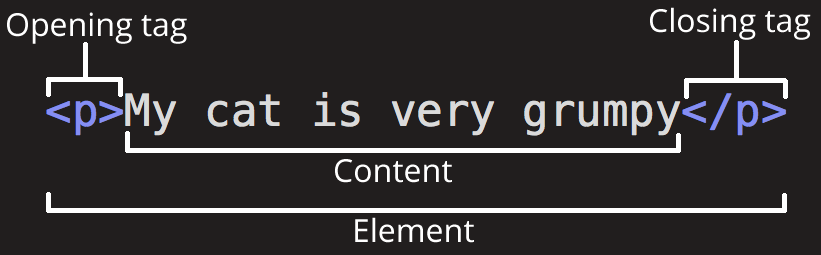

Inside the Tags, there will be also Key-Value pairs called **Attributes**. They are usually in the format of **attribute="value"** (take note the value is enclosed in quotation marks). These **Attributes** are used for various applications like specifying the color of an Element, or in our case, locating that Element in the Document.

In our previous HTML example, we see that the Anchor (with tags `<a></a>`) has an attribute `href`. Such element usually signify a **link** to another Web Page or another part of the Current Page.

**NOTE**: **Attribute** values are usually (or should be) **Quoted**. So make sure if you need to get information from the **Attributes**, use the `unquote` function from the `urllib.parse` library.

![image.png](attachment:7c5470d5-90dd-4830-80fa-c3e430b7c165.png "Source: https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics")
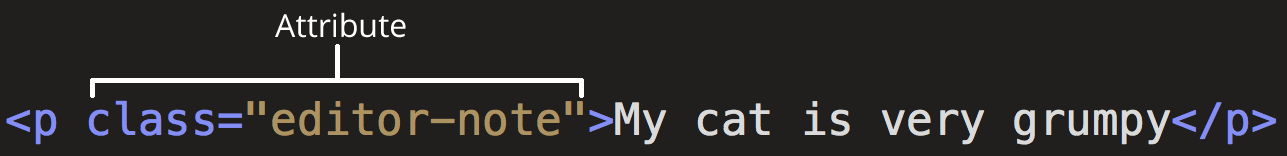

For Scraping, we look at the HTML Document to **find the location of the content on the Element or Attribute** on the HTML Structure.

But looking at an HTML Document itself is dizzying (refer to **[SPOILERS], this is what an HTML Document looks like in real life.** on the previous Section.)

Luckily, the Web Browser has a useful tool to help us Explore a Web Page easily.

#### Section 1.3.2: Using the Developer Tools of a Web Browser

Let's go back to our old Trusty Chrome Browser.

[**Input that specific Job Posting on Mynimo**](https://www.mynimo.com/jobs/view/445552/), and then **Press F12**.

You can also do a **Left Click on the Page, then Click Inspect**.

Welcome to the world of **DevTools**! This will make exploring the HTML Document MUUUCH easier.

Make sure you're on the **Elements** tab so we're seeing the same thing.

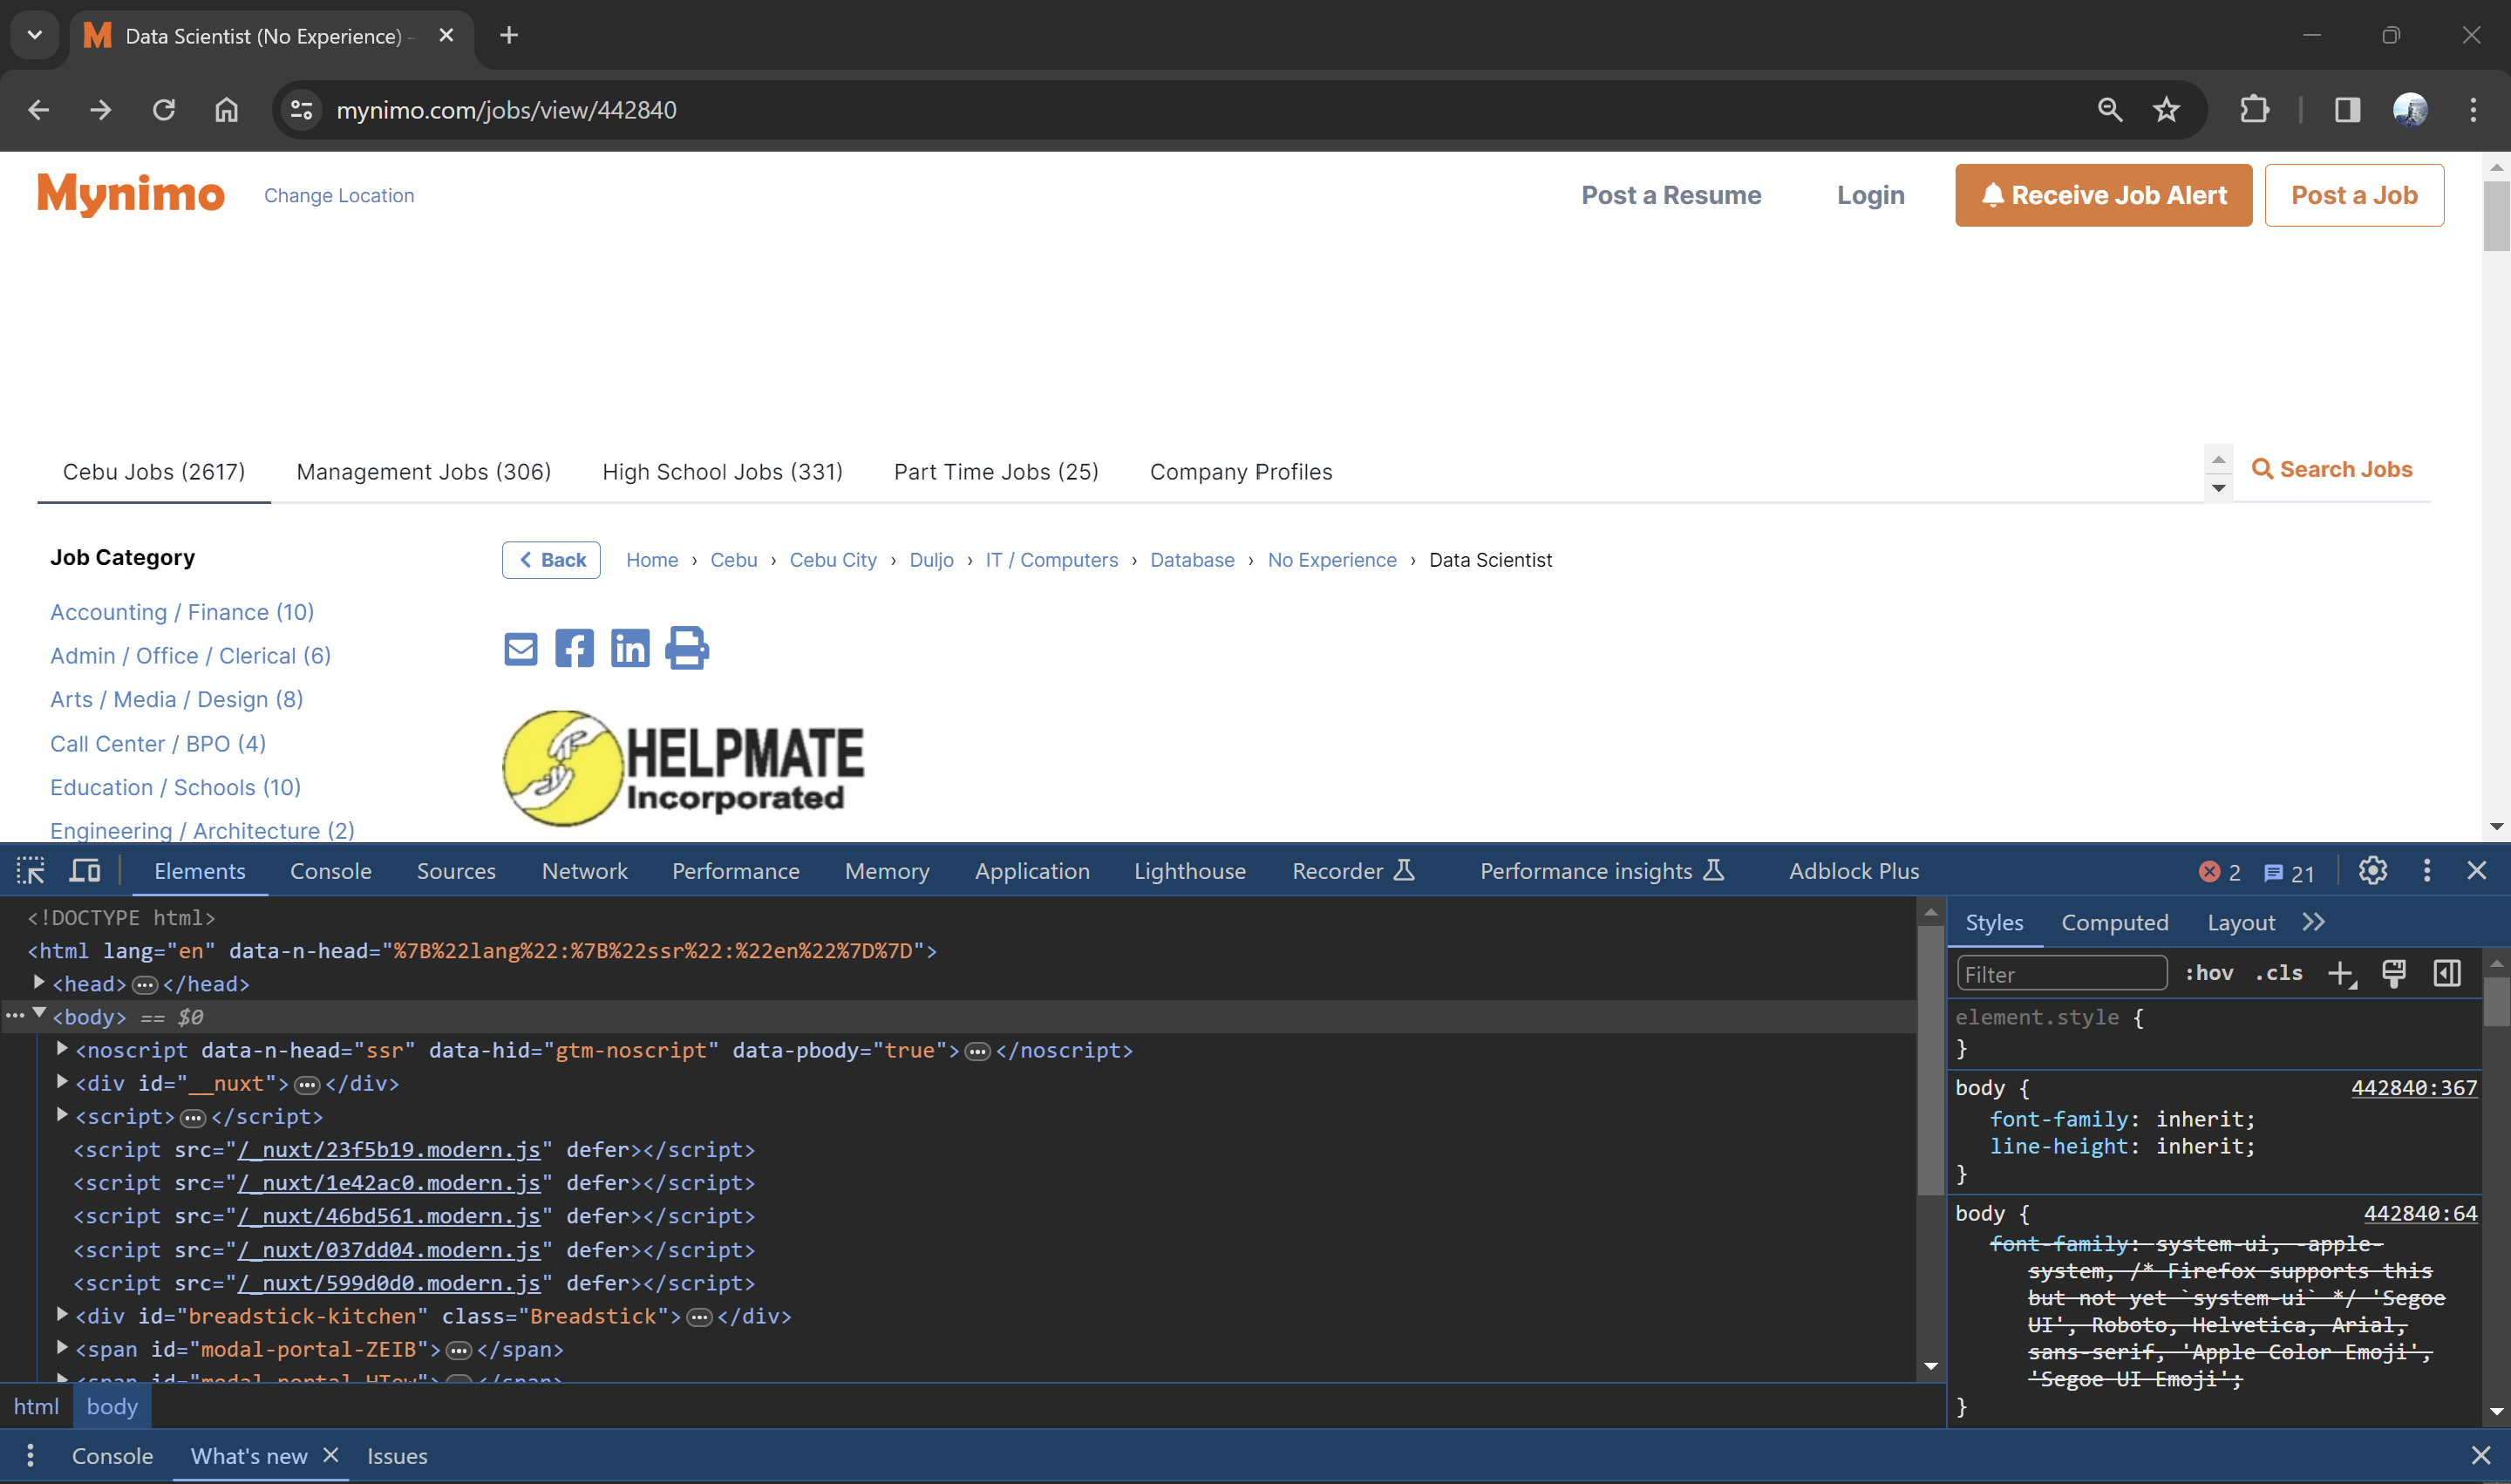

What you see now is a Web Scraper's favorite tool! As a Web Scraper, we can do three things here mainly:

1. Locate a Specific Element on the HTML Document by Hovering it on the Web Page. You can do this by either Pressing **CTRL + Shift + C** or **Clicking the Button on the Upper Left Corner of the DevTool**.
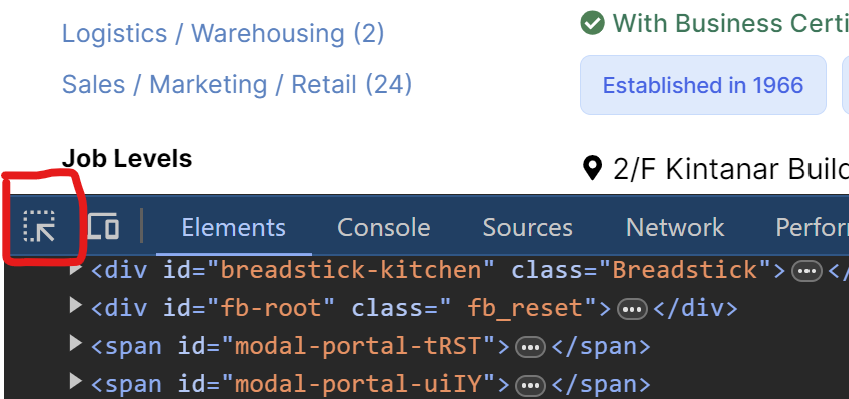

2. Search the HTML Document for Text, Tags, Attributes, or Content using a regular **CTRL + F** search, and
3. Test **XPath** expressions on the same DevTools search bar to locate an Element in the HTML Document.
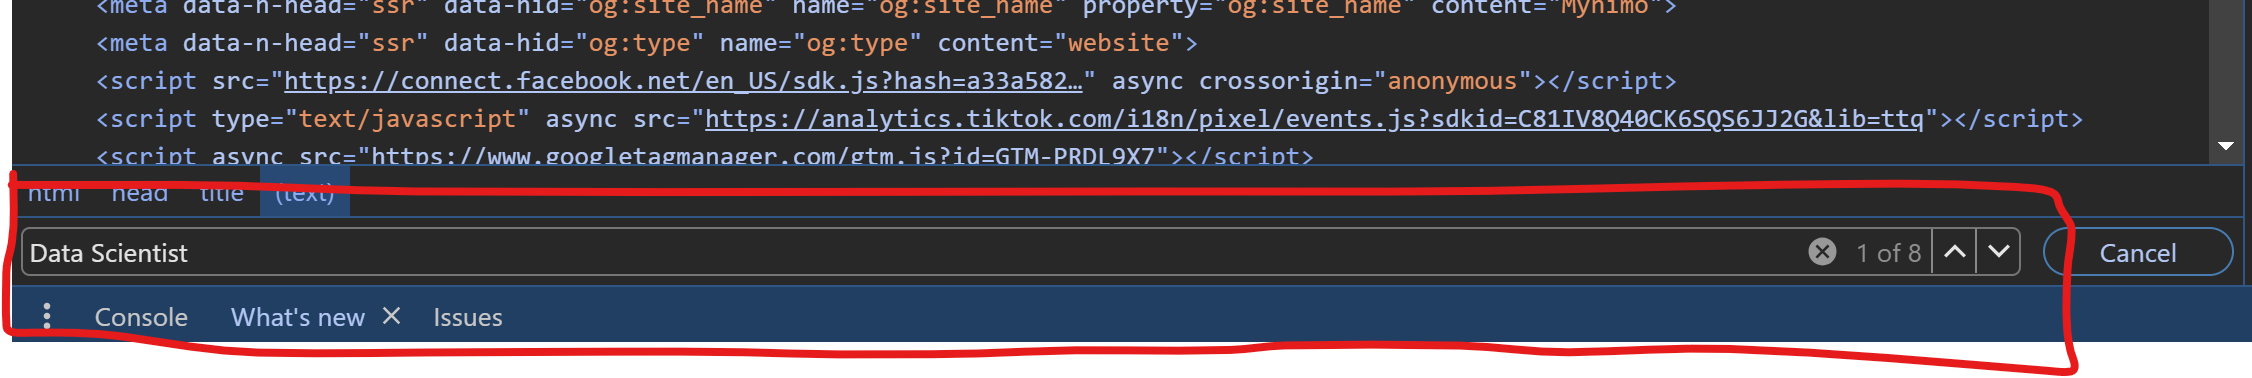

We'll discuss **XPath** in the next Sub-Section. But why don't you play around the **DevTools** first.

#### Activity 1.3.1: Play around Google Chrome DevTools (5 minutes)

Goal of playing around is to find where in the HTML Document are these following information located:
- **Job Position**
- **Experience Level**
- **Company Name**
- **Job Location**
- **Date Posted**
- **Job Description (the entire text)**

Take note of the **Tags**, **Attributes**, **Content**, and the **Elements** before, after, or on the same level as those.

Again, use the Chrome DevTools for this, and use both the Inspect Element (the Hovering over Elements thingy) and the Search Bar.

#### Section 1.3.3: Using XPath to Locate Elements on the HTML Document

For both Web Automation and Scraping, we need a way to Locate the Elements in the HTML Document that contain the Information that we need. There are easier ways to do this like finding common **Attributes** like **ID**, **Name**, **Class**, or looking for the **Tag** itself. But these methods are actually **unreliable** because a lot of times, these **Attributes are not even found** on the Elements that we're looking, or that they're **not unique enough** to pinpoint the Element that we want. So we need some sort of Notation for our **Locator**.

That's where **XPath** comes in.

**XPath (XML Path Language)** are used to navigate any **XML (Extensible Markup Language)**-like Document, or basically anything that uses **Tags** and **Elements**. It's looks like a **File Path**(or our URL Path) (e.g. /path/to/file).

To illustrate, let's go back to our basic HTML Document example, with some modifications:

```html
<!DOCTYPE html>
    <head>
        <title>Hello World!</title>
    </head>
    <body>
        <h1> This is your first HTML document </h1>
        <br>
        <p>This is how you make <strong>lumpia</strong></p>
        <p>This is NOT how you make <i>lumpia</i></p>
        <br>
        <a href="https://www.mynimo.com">This goes to Mynimo.com</a>
    </body>
</html>
```

Let's say I would like to select the Anchor Element (\<a\>) on the Page. We can definitely locate that using a Tag selector since it's the only Anchor Tag in the HTML Document. But we're learning XPath, aren't we? So let's do XPath.
- For a complete XPath expression of the Anchor tag, that would be `//html/body/a`. The text beside the slashes are Tags. And hopefully, you noticed that it does look like a File Path. The first Tag after the initial `//` is called the **Root Node**.
- You can also use XPath to look for Tags for the entire document. The expression for that would be `//a`. The`//` part means **match the entire Document at any level with the following expression**. The Tag beside the XPath expressions usually start with that.
- You can also use **Conditionals** for XPath matching by utilizing the brackets `[]`. Let's say I want to match any Element that has the Attribute **href** equal to **https://mynimo.com**. You can say: `//*[@href="https://www.mynimo.com"]`. The **`*` means match an Element with ANY tag**. You can also specify other conditionals inside the `[]` Then **for the Attribute Matching, make sure it has `@` at the start**. And for the matched **Value** to the Attribute, **enclose it with Single (' ') or Double (" ") Quotation Marks**.
- You can also **match by the Text inside by using the `text()` function**. Let's say I want to match the *Hello World!* title, I say `//*[text()="Hello World!"]`.
- You can even have more complicated matching like let's say, I want the Paragraph Element (\<p\>) that has an Italic Element (\<i\>) inside. You can say `//p[./i]`. So yes, you can also mix and match whatever is inside those **Conditionals**.
- XPath can match **multiple elements**. Like let's say `//body/p` will match the two Paragraph Elements. If you want to select JUST the first Paragraph, you say `(//body/p)[1]`. Take note that **XPath Arrays starts with 1 instead of 0**, like how programmers are used to.

I cannot teach you all the tricks and tips for XPath right now, so please check [**this guide**](https://www.w3schools.com/xml/xpath_syntax.asp). Or ask the instructor. Or... just learn by doing. Which is what I'm gonna give your right now.

#### Activity 1.3.2: Find the XPath for the Elements of the Information that we're looking for. (30 minutes)

If you remember, we're looking for the following data:
- **Job Position**
- **Experience Level**
- **Company Name**
- **Job Location**
- **Date Posted**

To get that, do the following exercises:
1. Use the **Google Chrome DevTools** to **find the Elements** that contain these information. You did this already on the previous activity.
2. Once you find them on the website, use **XPath** to locate the Elements that contain these information.
3. Test these **XPath** on multiple Job Postings on Mynimo, to make sure that those XPath you've set are consistent all across the Websites that we're scraping.

In [ ]:
# You can write your XPath here. Again, make sure you enclose the text on Quotation Marks,
# and Run this Cell so you can use these variables on the next Code Cells.
job_position_xpath = ""
experience_level_xpath = ""
company_name_xpath = ""
job_location_xpath = ""
date_posted_xpath = ""

#### Section 1.3.3: Using LXML AND XPath to Locate Elements on the HTML Document

Hopefully, you got your XPath Chops up by now! Let's use that XPath knowledge to Extract Data from the HTML Document! We'll be using the `lxml` library for Locating elements on our HTML Document, and extracting Contents from those Elements. LXML is a fast parser for XML-like Documents, including HTML.

To demonstrate, we'll use the XPath examples on the previous section.

In [ ]:
from lxml import etree

# Set Up LXML HTML Parser.
parser = etree.HTMLParser()

document = """
<!DOCTYPE html>
    <head>
        <title>Hello World!</title>
    </head>
    <body>
        <h1> This is your first HTML document </h1>
        <br>
        <p>This is how you make <strong>lumpia</strong></p>
        <p>This is NOT how you make <i>lumpia</i></p>
        <br>
        <a href="https://www.mynimo.com">This goes to Mynimo.com</a>
    </body>
</html>
"""

# Parse the Document
root_node = etree.fromstring(document, parser)

In [ ]:
xpath = '//html/body/a'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

In [ ]:
xpath = '//a'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

In [ ]:
xpath = '//*[@href="https://www.mynimo.com"]'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

In [ ]:
xpath = '//*[text()="Hello World!"]'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

In [ ]:
xpath = '//p[./i]'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

In [ ]:
xpath = '(//body/p)'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)
print(root_node.xpath(xpath)[1].text)
print(root_node.xpath(xpath)[1].tag)

In [ ]:
xpath = '(//body/p)[1]'
print(root_node.xpath(xpath)[0].text)
print(root_node.xpath(xpath)[0].tag)

Take note on the last example, only the Text that are inside of the Paragraph tag *\<p\>* and outside of the next Italic tag *\<i\>*.

If you want a challenge, you can find what `lxml` command that can show the entire *"This is how you make lumpia"* text.

If you don't want that challenge, then you have no choice but to take this next challenge.

#### Activity 1.3.3: Extract Data from the Job Posting Page using XPath and LXML. (30 minutes)

**Alright!** Show me what you got! You got the XPath Expressions on the last Activity. And of course you can get the HTML Document of a Job Posting Page from the Previous Section.

Combine these and get the following information from the Job Posting Page:
- **Job Position**
- **Experience Level**
- **Company Name**
- **Job Location**
- **Date Posted**

Take note that we're imposing modularity here, AKA putting your Python code inside methods (or functions in other Programming Languages). This is that so you can easily copy paste the code to the next Activities.

In [ ]:
# I'm just creating scaffolding that you can use on the next Chapters.
import response
from lxml import etree


def get_job_posting_page(url: str) -> str:
    # Insert your Response GET thingymabob here.

    return document

def extract_data_from_page(document: str) -> dict:
    job_position = ""
    experience_level = ""
    company_name = ""
    job_location = ""
    date_posted = ""

    # Insert your HTML Parsing here using XPath and LXML

    return {
        "job_position": job_position,
        "experience_level": experience_level,
        "company_name": company_name,
        "job_location": job_location,
        "date_posted": date_posted
    }

url = "Insert the URL of the Job Posting Page here"
document = get_job_posting_page(url)
data = extract_data_from_page(document)

And you have just scraped your First Web Page!

Congratulations!

Now, here comes the fun part: We're gonna scrape MULTIPLE Job Postings from Mynimo. Which is what we'll do on the next chapter.

## Chapter 2: Scraping Multiple Pages

### Section 2.1: This was supposed to be a Web Crawling Chapter but...

This was supposed to be a Web Crawling Chapter where we'll use Scrapy to Crawl the entire Mynimo site. But that's actually overkill for what we need to do today.

To summarize, **Web Crawling** is a more extensive Web Scraping of an **Entire Website**. So it accesses all possible links on every page of the website, and getting data while it's at it. `Scrapy` is the most popular Python Web Crawling Framework there is, and I'd encourage you to check it out if y'all have the time.

**Web Crawling** is used by Search Engines to Index your websites. Aaaand I'll stop discussing since I'm setting it as out of scope.

Besides... we CAN scrape multiple Job Posting Pages with just `Requests`, `LXML` and XPath. And you're gonna do it!

### Section 2.2: Let's Finally Scrape the Work From Home Jobs Page from Mynimo.

Remember that we wanted to get Work From Home Job Postings from Mynimo.com (OKAY WE'RE FINALLY GETTING BACK IN TRACK AFTER BEING DISTRACTED FOR THE ENTIRE CHAPTER 1). The Page looks like this:

In [ ]:
from IPython.core.display import HTML


url = "https://www.mynimo.com/home-based-jobs"

# Extract the Text from the HTTP Response Body
document = get_html_page_from_url(url)

# Use this command to display the Text as a Web Page.
display(HTML(document))

PS: The Code Cell above isn't gonna run if you haven't done Activity 1.3.3 correctly. Please use methods to implement your solution.

Check the Website on your Chrome Browser DevTools, and hover over the links to the Job Posting. You will see Anchor tags that has **href** Attributes that contain the **Paths** to the Individual Job Postings.

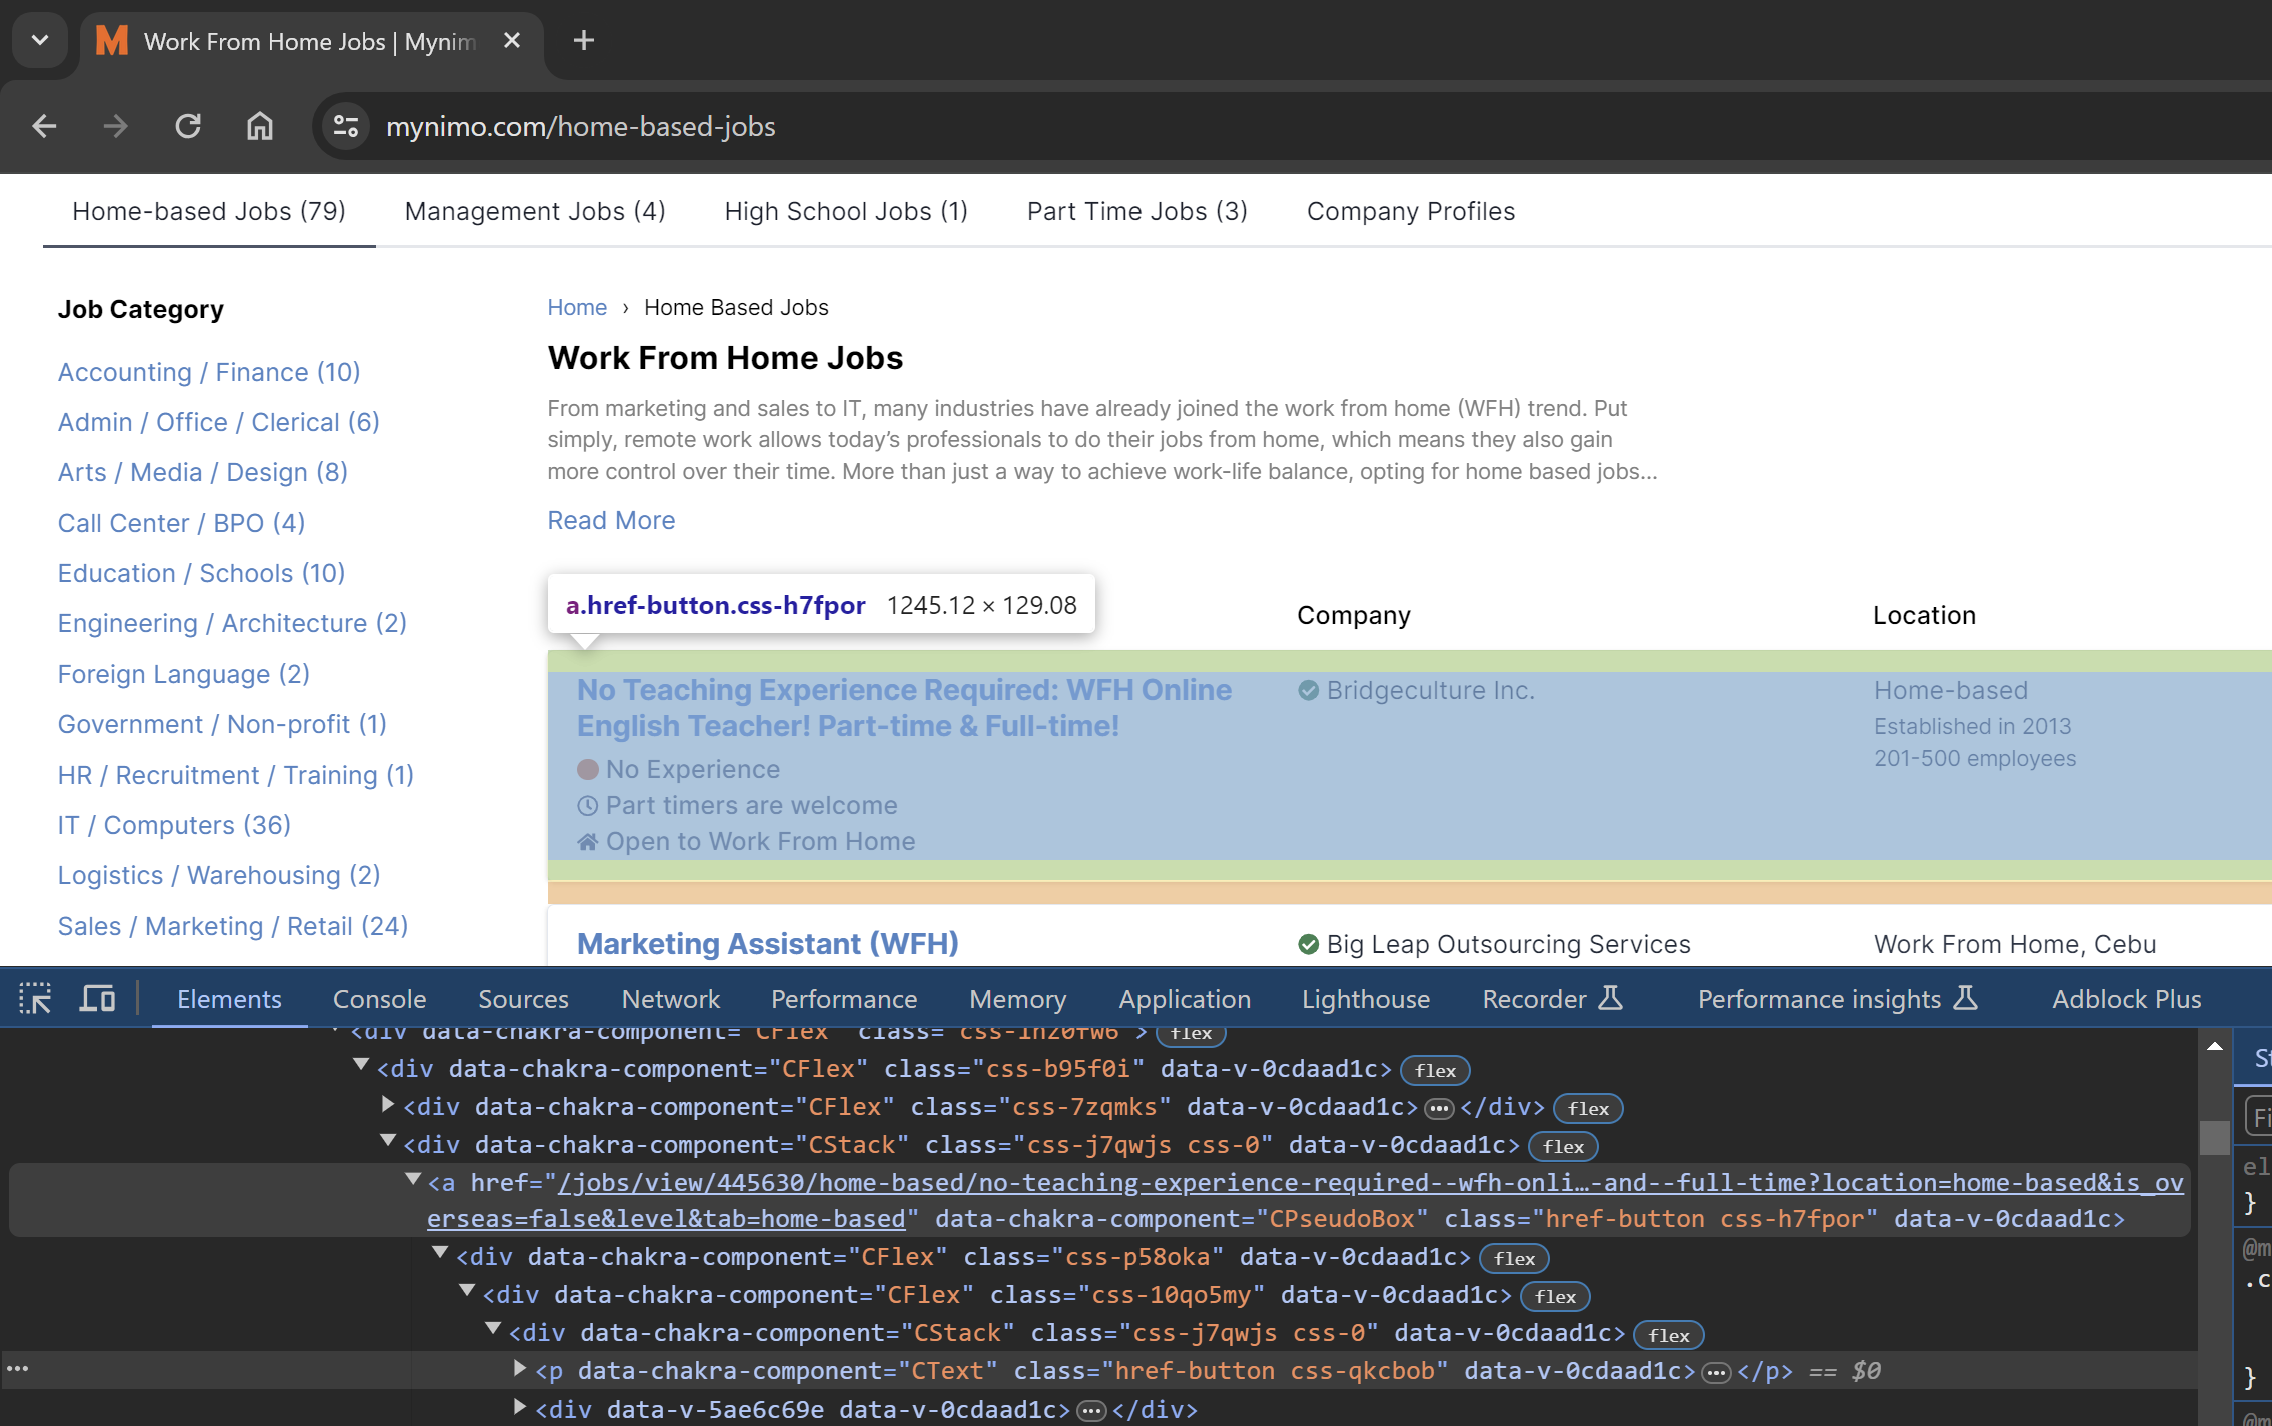

So, here's the next activity for you.

### Activity 2.1: Extract the Job Posting URLs from the Work From Home Jobs from Mynimo.com

From the Work From Home Jobs Page, extract all the Job Posting Page URL's. As usual, use `requests`, `lxml` and XPath only, and some string manipulation.

Do take note that the **href** values only contain the **Path** of the Page. So you might want to add the **Domain Name** to make it a full URL.

We are expecting the output as a list of string. So to initialize a string, you can do:

```python
job_posting_page_url_list = []
```

Then, to add an `item` to the list, you do:

```python
job_posting_page_url_list.append(item)
```

Also, am gonna help you set up some scaffolding on the code. So your `extract_urls_from_page` will only need to have the **Document** from the **HTTP Response**. You should have done that on the Previous Activity, with the `get_html_page_from_url`. And make sure you've run **ALL** previous Code Cells for this to run.

So, code away!

In [ ]:
from lxml import etree

def extract_urls_from_page(document: str) -> list[str]:
    job_posting_page_url_list = []
    # Insert your code here.

    return job_posting_page_url_list

url = "https://www.mynimo.com/home-based-jobs"
document = get_html_page_from_url(url)
job_posting_page_url_list = extract_urls_from_page(document)

You done? Onto the next! You're gonna combine the previous Activities!

### Activity 2.2: Extract Data from Multiple URLs

Okay, just in case you haven't done Python or Programming yet, I'll teach you a bit of how to do of looping. Check out the following Code Cell:

In [ ]:
url_list = ["url1", "url2", "url3", "url4"]

for url in url_list:
    print(url)

So the `for-loop` here goes over each item on the list. Then inside that loop, you do stuff on that item.

Alright? Okay. Now, combine the previous activities to do the following:
1. Get the HTML Document from the `Mynimo Work From Home Jobs` Page URL of with `response`
2. Get the Job Posting Page URLs from the HTML Document of the `Work From Home Jobs` Page using `LXML` and **XPath**
3. For each Job Posting Page URL, get the HTML Document of each Page using `response`
4. Get the following information from the Job Posting Page URL.
    - **Job Position**
    - **Experience Level**
    - **Company Name**
    - **Job Location**
    - **Date Posted**

Bonus: Use `Pandas` library to put the information on a Dataframe. Sadly, I can't really teach you this one anymore as we have limited time. But I heard some of y'all did Machine Learning. If you did, this workshop shoul be Peanut Kisses for ya.

In [ ]:
# Tough love here, eh. Not much help anymore as I've given all of it earlier.
# Ubos na ubos na ako. HUHUHU

## Chapter 3: Web Automation Basics with Selenium

There is **ONE more hiccup** on our code. If you check back the the Work From Home Jobs Page of Mynimo, you'll see that there's a **Paginate** (Paginate is what we call the buttons we use for navigating through Pages of Lists). That means we haven't gotten ALL the Work From Home Job Postings possible.

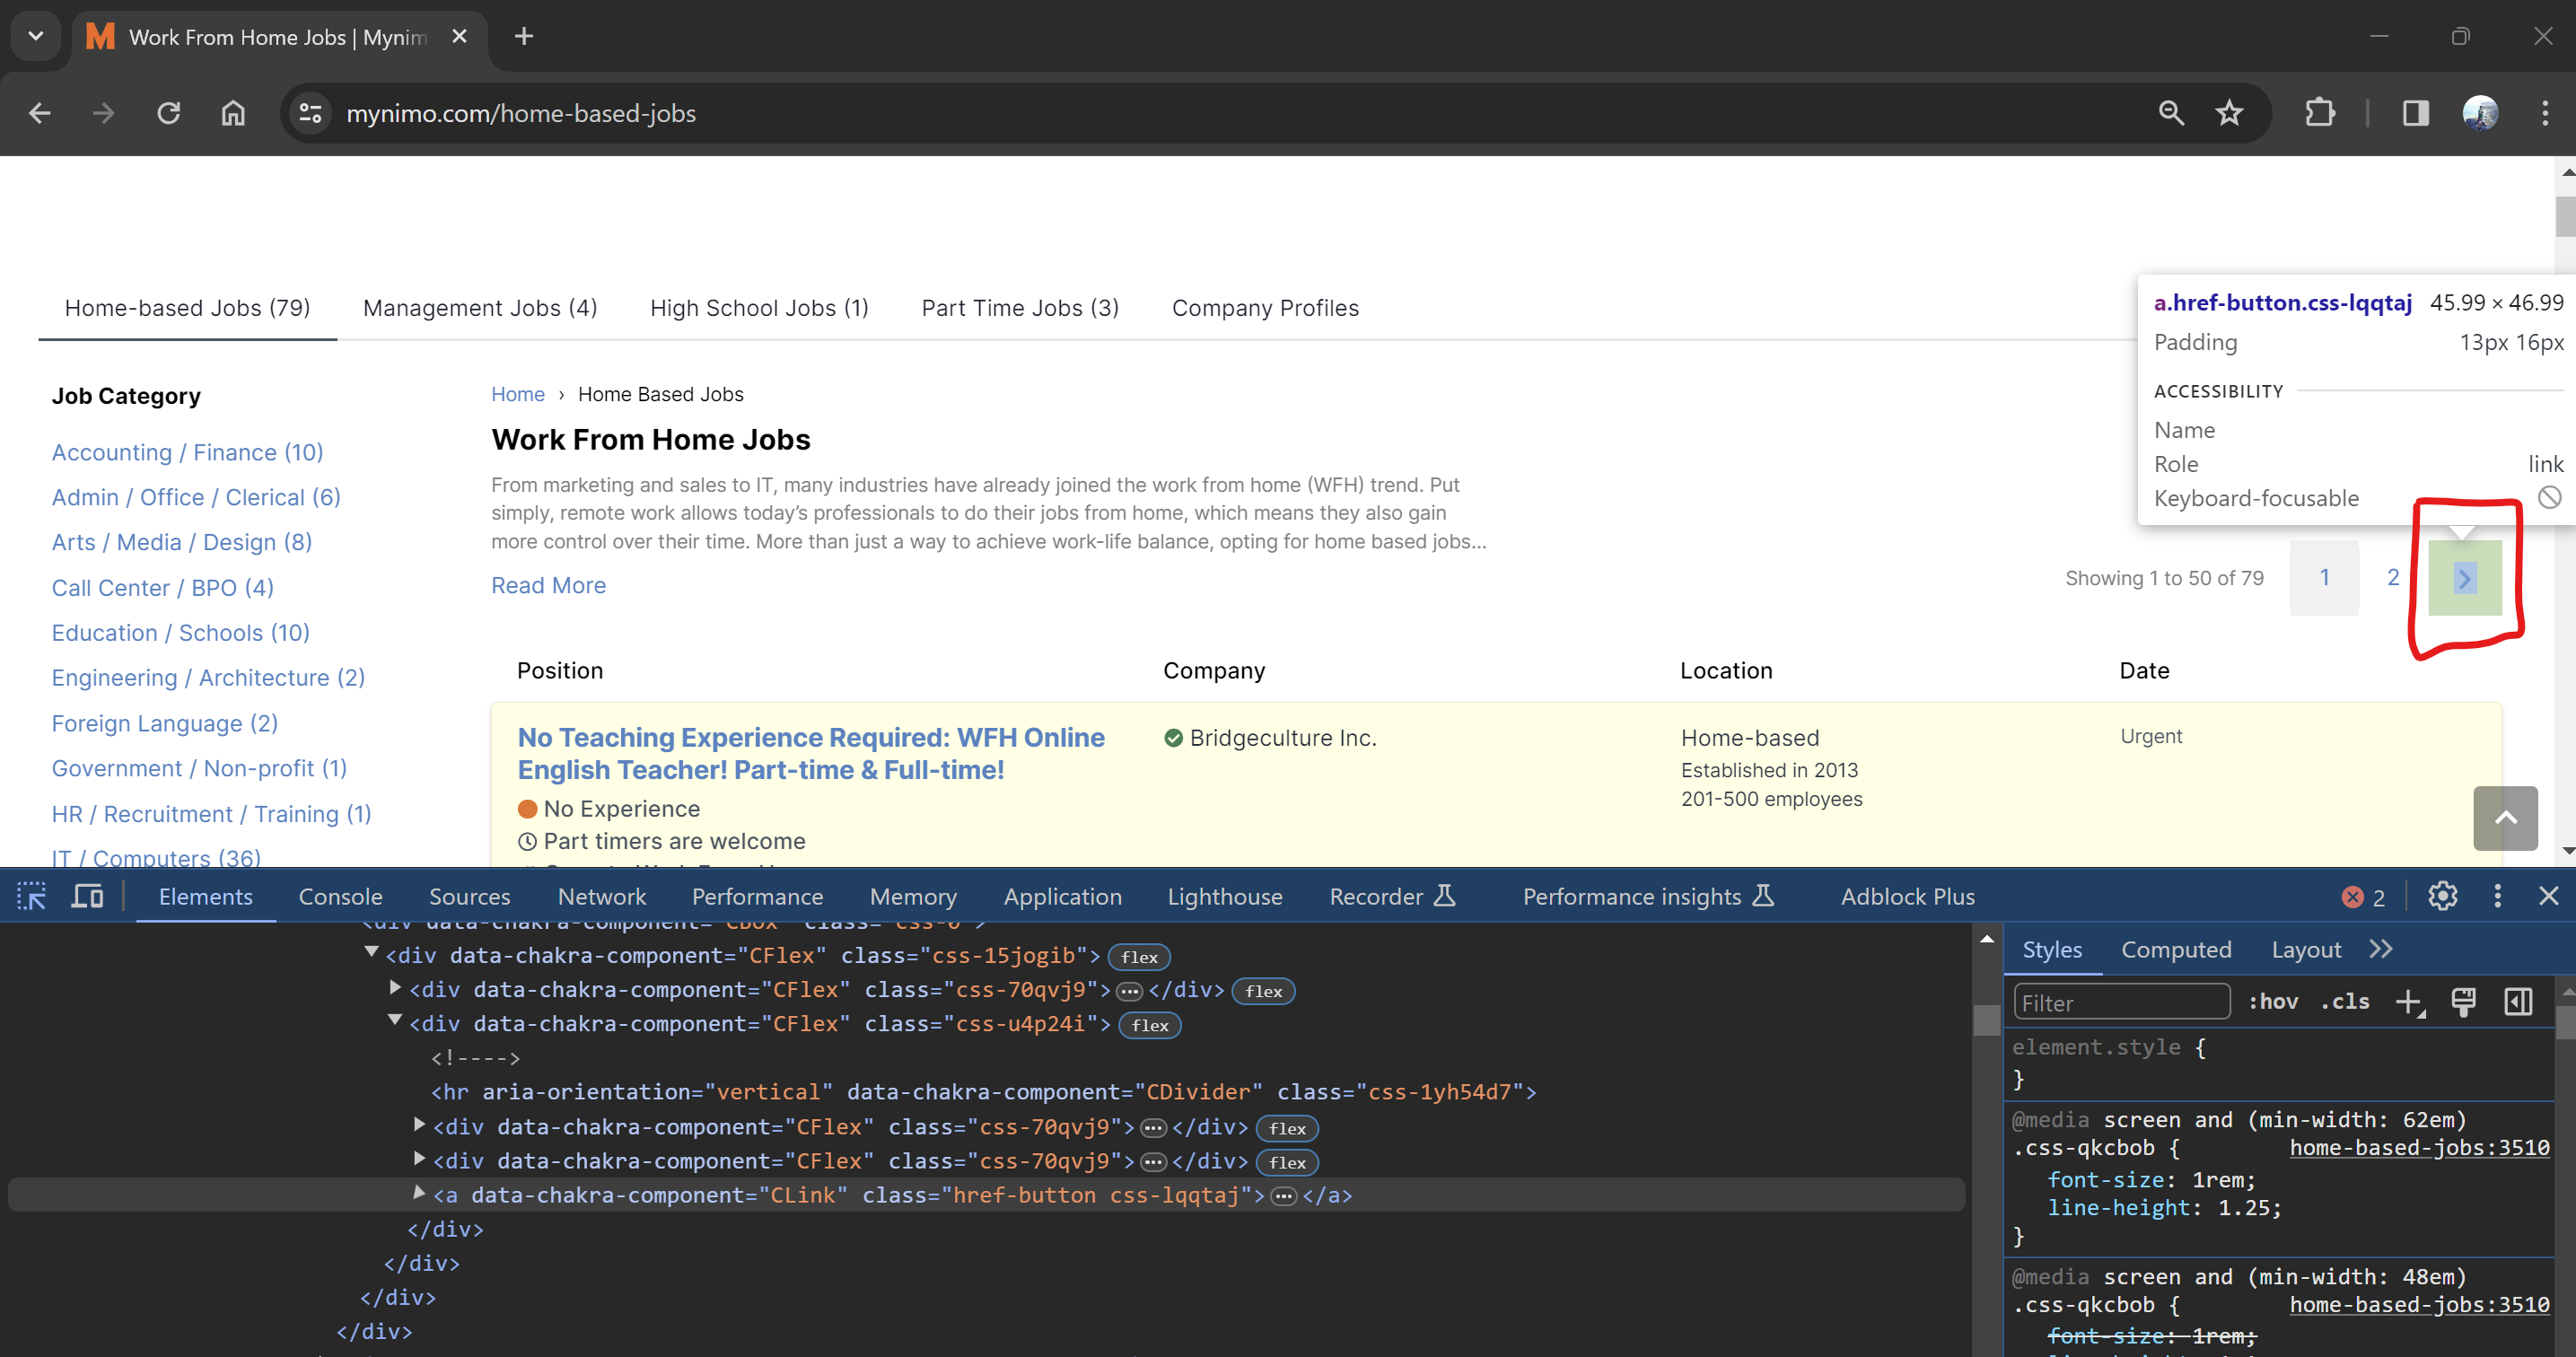

Usually we use **URL Parameters** to deal with Paginate. Sometimes it's the **Path**. To check, let's play around the website. Click either the **Next Page** button or **Page 2** button.

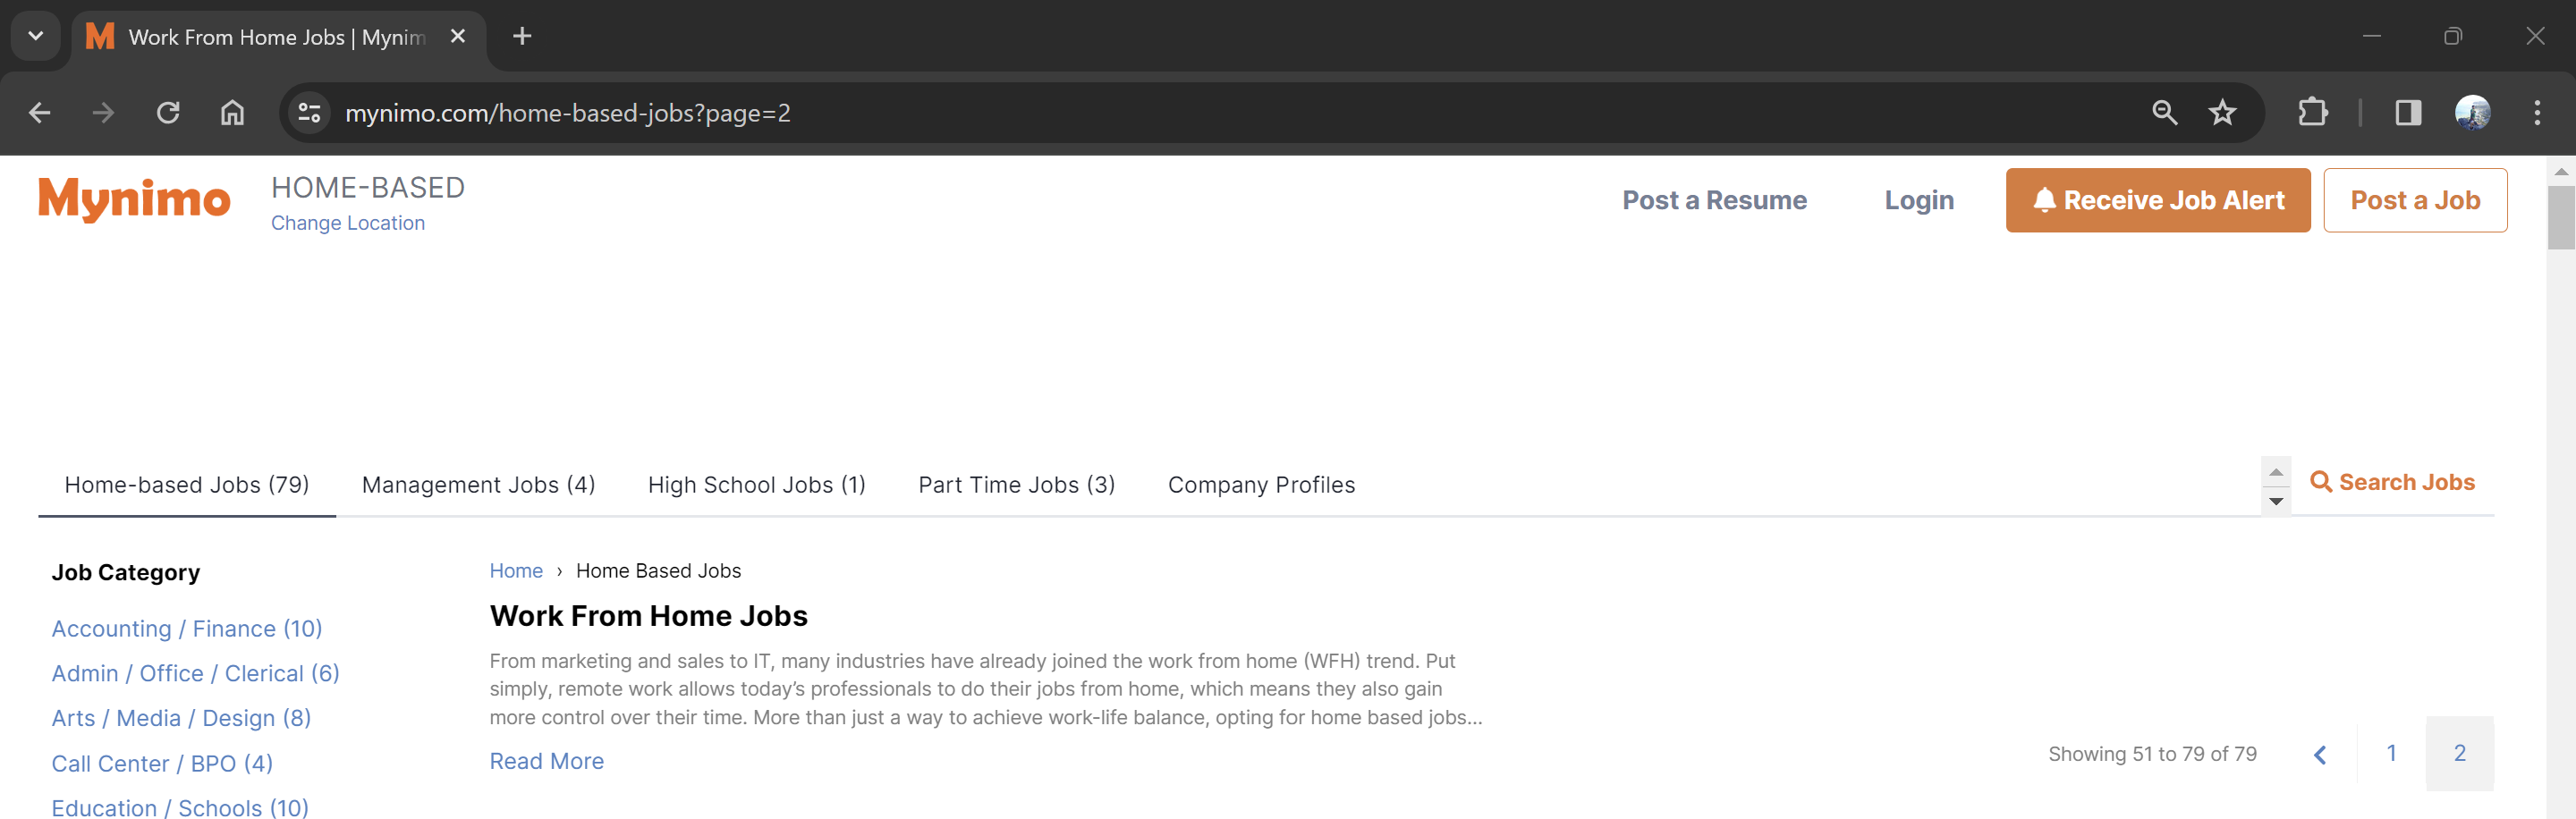

Our hunch as of now is kinda right. They use a **Parameter** **page** to navigate. Maybe we can do this by URL. So let's try it out.

Execute the Code Cell below:

In [ ]:
from IPython.core.display import HTML

url = "https://www.mynimo.com/home-based-jobs?page=2"

# Extract the Text from the HTTP Response Body
document = get_html_page_from_url(url)

# Use this command to display the Text as a Web Page.
display(HTML(document))

That... did not go to the Page we wanted to go.

Before you trash how bad the Mynimo developers are, there are legit reasons why they would make it confusing to predict the URL.

But whether this is by design or by incompetence, that just means we cannot use URL manipulation to fully get all the Job Posting Pages.

We have to use a Browser Automation tool. And that's where `Selenium` comes in.

### Section 3.1: Selenium Basics

Selenium is a Framework for Programmatically control a Browser.

Yes, the current Browser that you have.

So instead of you, it'll be your Python Program that will surf through the web on that Browser.

Now, we did the heavy lifting on setting up Selenium, because I can say that Selenium is a pain in the gluteus maximus to set up. So make sure you've executed **EVERY CODE CELL** on Chapter 0.

So now when you're ready, I'm gonna give you some basic Selenium commands that you need.

So they are all found on the Code Cells below. Kind run and play around with them.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

# Install the Chrome Web Driver. The Web Driver is a Program that lets you
# control the Browser you have on your Machine.
service = ChromeService(ChromeDriverManager(get_chrome_version()).install())

# Open the Chrome Browser
browser = webdriver.Chrome(service=service)

In [ ]:
# Have your browser go to a website
url = "https://www.mynimo.com/home-based-jobs"
browser.get(url)

# Get the Web Page's HTML Document
document = browser.page_source
display(HTML(document))

Since you're kinda using a Web Browser now, you can technically use `Selenium` all the way on all the previous task. It can even navigate URL's and *GET* HTML Documents for you. But using `Selenium` is slow, and overkill in most cases.

So the main use case of Selenium here is if we cannot do URL manipulation to get the information we want, but we have to interact with the Web Page for some Elements to come out. And they're mostly dynamic, `Javascript` generated HTML content.

This has been common with most modern Sites, where we have stuff like Infinite Loading, Single Page Application, such that the URL stays the same even if the Page is changing.

But for our application... we just need to click a Single Button.

Oh, speaking of which, these are. We'll still be able to use our XPath knowledge to Locate and Interact with Elements on the Page.

In [ ]:
from selenium.webdriver.common.by import By


# I'm clicking the Next Button on this.
next_button_xpath = "//a[@class='href-button css-lqqtaj']"

# To Locate an Element, use the find_elements() method on the browser object. You can
# use XPath in Locating the Element by adding By.XPATH on the first parameter.
next_button = browser.find_elements(By.XPATH, next_button_xpath)

# find_elements() returns a list of elements. Let's just use the first item, meaning the
# first match, and click on it to click()
next_button[0].click()

In [ ]:
# You can also get text inside the elements using Selenium.
current_page_xpath = "//a[@class='href-button css-lqqtaj']"
current_page_button = browser.find_elements(By.XPATH, current_page_xpath)
current_page_button[0].text

In [ ]:
# This will close the Browser.
# Take note that if you've already closed the browser on your own, you don't need to call
# browser.close()
browser.close()
browser.quit()

## Chapter 4: Technical and Ethical Issues on Web Scraping

Let's just discuss some of them.

1. Companies **change their Websites frequently**, so it's a dedicated game of Catch Up, especially if you want to scrape frequently.
2. Companies HATE scraping that they Frequently Ban it on their Terms and Conditions, or they make it HARD for you to Scrape. Because if you've been living in a ChatGPT-generated rock, due to how valuable AI, Machine Learning, and Big Data is, they're now valuing their Data. **They'd rather have you pay than to scrape their data for free**.
3. Companies might also mistake you as **Security Issues**. Since... you can use the same Libraries to let's say... flood a Website with Requests. So they'd usually block HTTP Requests from a certain Agents. That's why we had to change the **User-Agent** to *Chrome* instead of the default by `requests` library.
4. It's actually legal to Scrape or Crawl **PUBLIC** websites. It's also legal for them to kick you out of the website. To be safe, check the **Terms of Service** of the website.
5. Sooo, you'll need to use some tools to protect your identity like **Proxies and IP Rotators** so that you can scrape regularly, and safely.

## Chapter 5: Closing Notes

Please join our **[Meetup.com page](https://www.meetup.com/PizzaPy-PH/)**, and like our **[Facebook Page](https://www.facebook.com/PizzaPy.PH/)** to keep updated on our latest events. Just in case you'll be in Cebu. And some of our events are livestreamed on the Facebook Page. So please do subscribe on our channels.

And if you like to join the Community Chatter (PizzaPy Superchat) on Messenger so you find people to chat about Python, Tech News, and Memes, please let me know or **ask anyone here if they're a member of the group**, and have them add and introduce you to the Group Chat.

From, PizzaPy - Cebu Python Users Group:

**Thank you!**

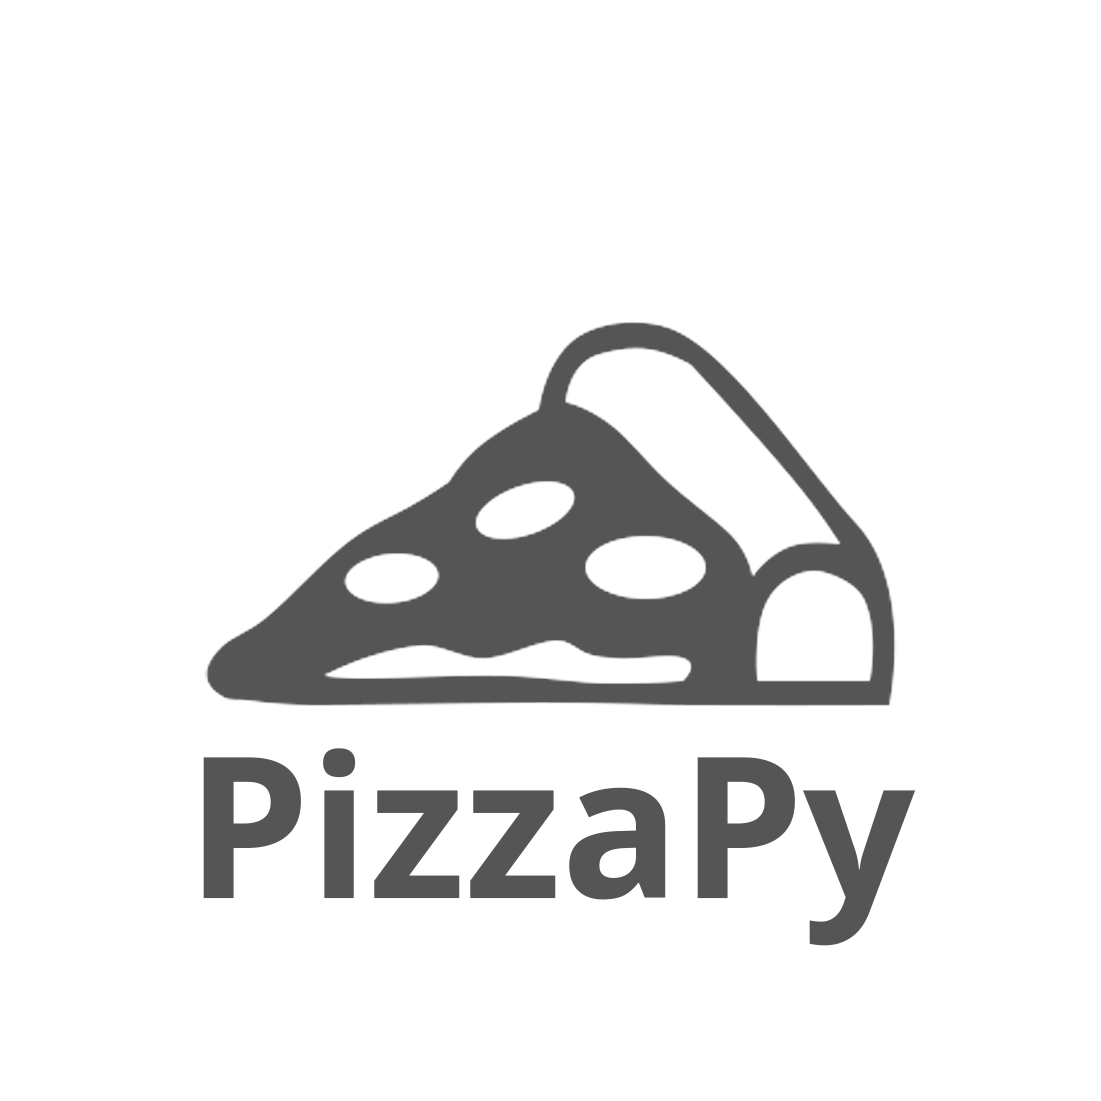

### References:
<a id='reference_1'></a>[1] A. Sweigart and Recorded Books, Inc, _Automate the boring stuff with Python: practical programming for total beginners_. San Francisco: No Starch Press, 2020.

<a id='reference_2'></a>[2] “What is a URL?,”  *What is a URL? - Learn web development | MDN* , Aug. 03, 2023. https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_URL (accessed Mar. 11, 2024).

<a id='reference_3'></a>[3] MDN Contributors, “HTTP,” MDN Web Docs, Aug. 03, 2019. https://developer.mozilla.org/en-US/docs/Web/HTTP (accessed Mar. 22, 2024).